# Complete EDA {Exploratory Data Analysis} of Loan Data Set

### Let's start!
##### Importing all the necessary Python Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

# Set Style
sns.set(style = "whitegrid")


### 1. Reading the Data Set

In [189]:
loan = pd.read_csv("loan.csv")
loan.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,nan,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,nan,1,INDIVIDUAL,n

### 2. Data Cleaning

Initial Shape of DataFrame

In [190]:
loan.shape

(39717, 111)

Percentage of Null Values (NaNs) in all the Columns

In [191]:
missing = round(loan.isnull().sum()/len(loan),2)*100
missing

id                                 0.0000
member_id                          0.0000
loan_amnt                          0.0000
funded_amnt                        0.0000
funded_amnt_inv                    0.0000
term                               0.0000
int_rate                           0.0000
installment                        0.0000
grade                              0.0000
sub_grade                          0.0000
emp_title                          6.0000
emp_length                         3.0000
home_ownership                     0.0000
annual_inc                         0.0000
verification_status                0.0000
issue_d                            0.0000
loan_status                        0.0000
pymnt_plan                         0.0000
url                                0.0000
desc                              33.0000
purpose                            0.0000
title                              0.0000
zip_code                           0.0000
addr_state                        

Most of the columns in our Data Frame has 100% empty , so let's drop all of them. Besides let's keep threshold as 30% which means we are going to keep only those columns which have atleast 30% of the total length of the Dataframe

In [192]:
to_drop =list(missing[missing >= 30].index)
len(to_drop)

58

58 columns need to be dropped as they contains values less than 30%

In [193]:
loan = loan.drop(to_drop,axis=1)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,Apr-16,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000
4,1075358,1311748,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,f,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,May-16,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000


Shape of Data frame after removing Null Columns

In [194]:
loan.shape

(39717, 53)

In [195]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Let's drop some more insignificant columns.
Here is the list of the Columns which will surely not help in our analysis- 
        1.  id
        2.  member_id
        3.  verification_status
        4.  pymnt_plan
        5.  url
        6.  zip_code
        7.  initial_list_status
        8.  collections_12_mths_ex_med
        9.  policy_code
        10. application_type
        11. acc_now_delinq
        12. chargeoff_within_12_mths
        13. delinq_amnt
        14. tax_liens
        15. title
        16. total_rec_prncp
        17. total_rec_int
        18. total_rec_late_fee
        19. recoveries
        20. collection_recovery_fee
        21. last_pymnt_amnt
        22. revol_bal

In [196]:
cols = ['id', 'member_id', 'verification_status', 'pymnt_plan', 'url', 'zip_code', 'initial_list_status', 
                    'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 
                    'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt', 'revol_bal']
loan.drop(cols , axis=1,inplace=True)

In [197]:
loan.shape

(39717, 31)

In [12]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

##### Removing Outliers

In [198]:
print(loan.annual_inc.describe())

count     39717.0000
mean      68968.9264
std       63793.7658
min        4000.0000
25%       40404.0000
50%       59000.0000
75%       82300.0000
max     6000000.0000
Name: annual_inc, dtype: float64


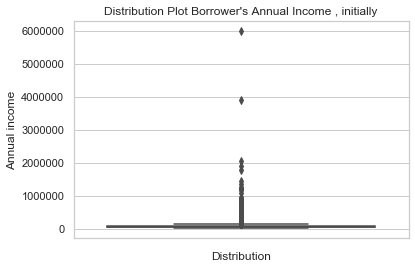

In [199]:
plt.title("Distribution Plot Borrower's Annual Income , initially")
sns.boxplot(y='annual_inc',data=loan)
plt.xlabel('Distribution')
plt.ylabel('Annual income')
plt.show()

The above graph shows that there are a lot of outliers present , so before proceeding further we should remove them.

Quantile Value = 234999.36


count    39319.0000
mean     65524.2158
std      35215.8853
min       4000.0000
25%      40000.0000
50%      58000.0000
75%      81000.0000
max     234996.0000
Name: annual_inc, dtype: float64




[]

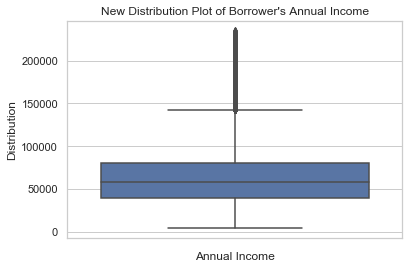

In [200]:
qnt = loan.annual_inc.quantile(0.99)

print('Quantile Value =', qnt)
print('\n')

loan = loan[loan.annual_inc < qnt]

print(loan.annual_inc.describe())
print('\n')

plt.title("New Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = loan)
plt.xlabel('Annual Income')
plt.ylabel('Distribution')

plt.plot()

##### Shape of our clean Dataframe

In [21]:
loan.shape

(39319, 31)

In [22]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000


Let's do some more manupulation like - 
 1. Removing "%" from int_rate column.
 2. Converting incorrect data type of int_rate from object -> float
 3. Derived Metrics Checklist - 1: Data-Driven Metrics

In [201]:
loan['int_rate'] = [x[0:-1] for x in loan.int_rate]
loan['int_rate'] = pd.to_numeric(loan.int_rate)
loan['issue_yr'] = pd.to_datetime(loan['issue_d'], format = '%b-%y').dt.year
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000,2011


### 3. Univariate Analysis

In [24]:
# Custom Function for Dafault Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.
# xlabel_rotation      -    The degree of rotation for the x-axis ticks (values).
# legend_flag          -    Boolean flag to check if a legend is required to be their in the plot.
# legend               -    Place legend on axis subplots.

def set_plotting_variable(figure_title, xlabel, ylabel, xlabel_rotation, legend_flag, legend):
    
    plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    
    if legend_flag == True:
        plt.legend(loc = legend)

In [25]:
# Custom Function for Univariate Analysis

# Function Parameters   -

# category              -      The category of the variable in consideration - Categorical or Continuous.
# plot_type             -      The type of the plot - Unordered Categorical (-lineplot) or Ordered Categorical (-countplot).
# series                -      The series/column from the data frame for which the univariate analysis is being considered for.
# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# hue                   -      The variable (categorical) in the data for which the plot is being considered for.
# data                  -      The data frame.
# legend                -      Place legend on axis subplots.

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_univariate(category, plot_type, series, figsize_x, figsize_y, subplot_x, subplot_y,
                    xlabel, ylabel, x_axis, hue, data, legend, xlabel_rotation):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    if category == 'Categorical':
        
        title_1 = "Frequency Plot of " + xlabel
        title_2 = title_1 + " across Loan Status"
        
        # Subplot - 1
        plt.subplot(subplot_x, subplot_y, 1)
        
        if plot_type == 'Unordered Categorical':
            sns.lineplot(data = series)
        
        elif plot_type == 'Ordered Categorical':
            sns.countplot(x = x_axis, order = series.sort_index().index, data = data)
        
        # Call Custom Function
        set_plotting_variable(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 2
        plt.subplot(subplot_x, subplot_y, 2)
        
        sns.countplot(x = x_axis, hue = hue, order = series.sort_index().index, data = data)
        # Call Custom Function
        set_plotting_variable(title_2, xlabel, ylabel, xlabel_rotation, True, legend)
    
    elif category == 'Continuous':
        
        title_1 = "Distribution Plot of " + xlabel
        title_2 = "Box Plot of " + xlabel
        title_3 = title_2 + " across Loan Status"
        
        # Subplot - 1
        plt.subplot(subplot_x, subplot_y, 1)
        
        sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
        # Call Custom Function
        set_plotting_variable(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 2
        plt.subplot(subplot_x, subplot_y, 2)
        
        sns.boxplot(x = x_axis, data = data, color = 'm')
        # Call Custom Function
        set_plotting_variable(title_2, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 3
        plt.subplot(subplot_x, subplot_y, 3)
        
        sns.boxplot(x = x_axis, y = hue, order = series, data = data)
        # Call Custom Function
        set_plotting_variable(title_3, xlabel, "Loan Status", xlabel_rotation, False, legend)
    
    plt.show()

##### For Unordered Categorical Variables - 
 1. loan_status
 2. home_ownership
 3. purpose
 4. addr_state

In [26]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000,2011


Fully Paid     32609
Charged Off     5584
Current         1126
Name: loan_status, dtype: int64




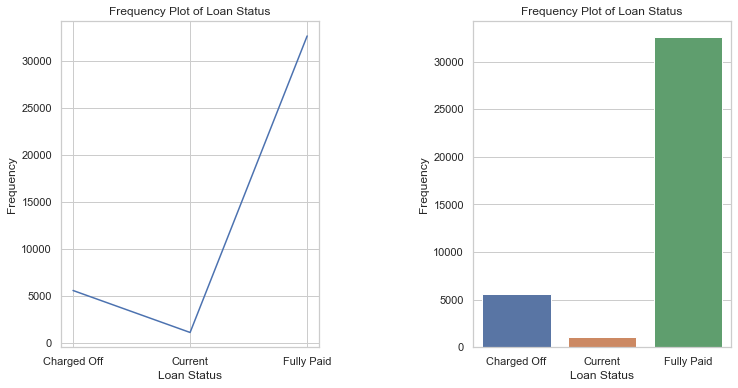

In [47]:
# Rank Frequency plot of loan_status
ser = loan.loan_status.value_counts(dropna=False)
print(ser)
print('\n')

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)

plt.title('Frequency Plot of Loan Status')
sns.lineplot(data = ser)
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)

plt.title('Frequency Plot of Loan Status')
sns.countplot(x = 'loan_status',  
              order = ser.sort_index().index, 
              data = loan)
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.6)
plt.show()

#### Out of 39319 entries , only 5584 are Charged off

RENT        18813
MORTGAGE    17378
OWN          3029
OTHER          96
NONE            3
Name: home_ownership, dtype: int64


loan_status  home_ownership
Charged Off  RENT               2824
             MORTGAGE           2302
             OWN                 440
             OTHER                18
Current      MORTGAGE            628
             RENT                416
             OWN                  82
Fully Paid   RENT              15573
             MORTGAGE          14448
             OWN                2507
             OTHER                78
             NONE                  3
Name: home_ownership, dtype: int64




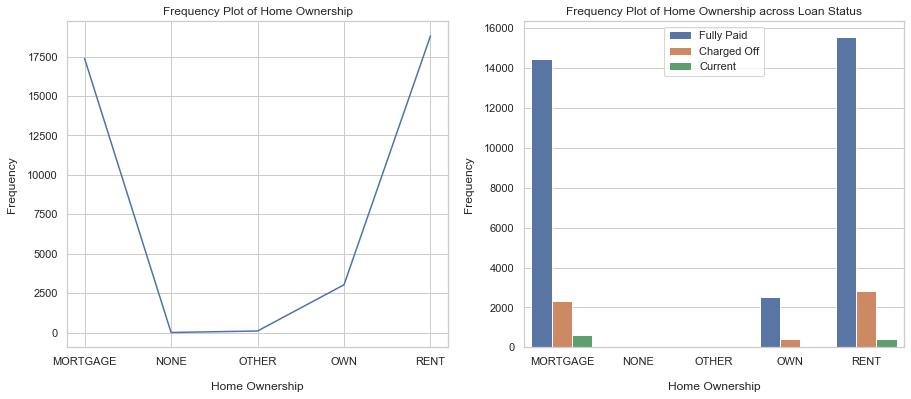

In [51]:
# Rank Frequency plot of home_ownership
ser = loan.home_ownership.value_counts(dropna=False)
print(ser)
print('\n')
print(loan.groupby('loan_status').home_ownership.value_counts(dropna=False))
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Unordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=6, 
                subplot_x=1, 
                subplot_y=2,
                xlabel='Home Ownership',
                ylabel='Frequency', 
                x_axis='home_ownership',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=0)
    

#### 'Mortgage' and 'Rent' house ownerships have max charged off as well as Fully paid

debt_consolidation    18497
credit_card            5089
other                  3958
home_improvement       2894
major_purchase         2166
small_business         1797
car                    1542
wedding                 937
medical                 686
moving                  577
vacation                381
house                   371
educational             323
renewable_energy        101
Name: purpose, dtype: int64


loan_status  purpose           
Charged Off  debt_consolidation     2752
             other                   629
             credit_card             537
             small_business          472
             home_improvement        338
             major_purchase          220
             car                     160
             medical                 106
             wedding                  94
             moving                   91
             house                    58
             educational              55
             vacation                 53
             

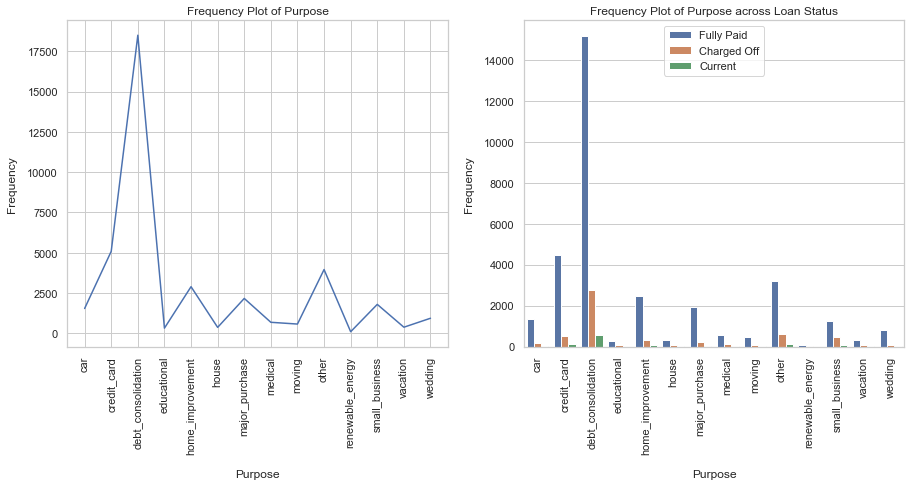

In [56]:
# Rank Frequency plot of purpose
ser = loan.purpose.value_counts(dropna=False)
print(ser)
print('\n')
print(loan.groupby('loan_status').purpose.value_counts(dropna=False))
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Unordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=6, 
                subplot_x=1, 
                subplot_y=2,
                xlabel='Purpose',
                ylabel='Frequency', 
                x_axis='purpose',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=90)

#### Top 3 purposes with most charged off's - 
1. debt_consolidation
2. credit_card
3. other

CA    7032
NY    3755
FL    2834
TX    2694
NJ    1826
PA    1508
IL    1505
VA    1396
GA    1388
MA    1321
OH    1217
MD    1036
AZ     869
WA     833
CO     782
NC     781
CT     736
MI     714
MO     681
MN     613
NV     492
SC     468
WI     459
OR     451
AL     449
LA     429
KY     324
OK     298
KS     271
UT     257
AR     245
DC     214
RI     194
NM     184
WV     177
HI     174
NH     169
DE     114
MT      85
WY      83
AK      79
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64




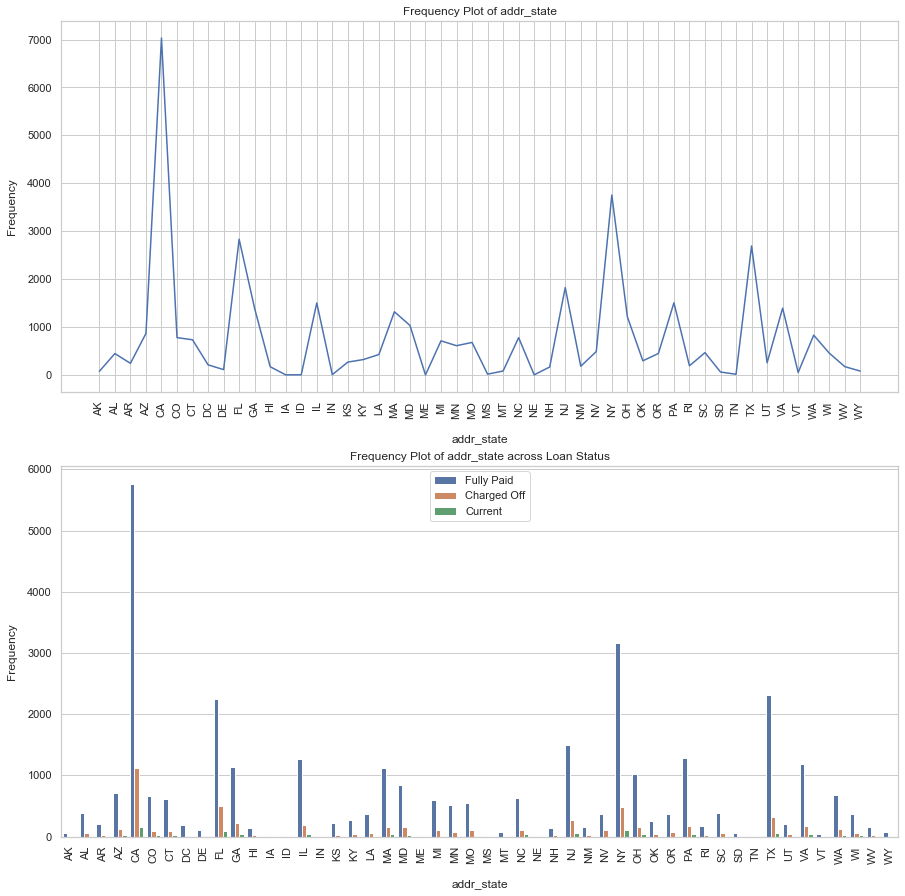

In [67]:
# Rank Frequency plot of addr_state
ser = loan.addr_state.value_counts(dropna=False)
print(ser)
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Unordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=15, 
                subplot_x=2, 
                subplot_y=1,
                xlabel='addr_state',
                ylabel='Frequency', 
                x_axis='addr_state',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=90)

##### Top 3 Address states of charged are - 
1. CA
2. NY
3. FL

##### For Ordered Categorical Variables -

    1. term
    2. grade
    3. sub_grade
    4. emp_length
    5. issue_yr

 36 months    28820
 60 months    10499
Name: term, dtype: int64


loan_status  term      
Charged Off   36 months     3201
              60 months     2383
Current       60 months     1126
Fully Paid    36 months    25619
              60 months     6990
Name: term, dtype: int64




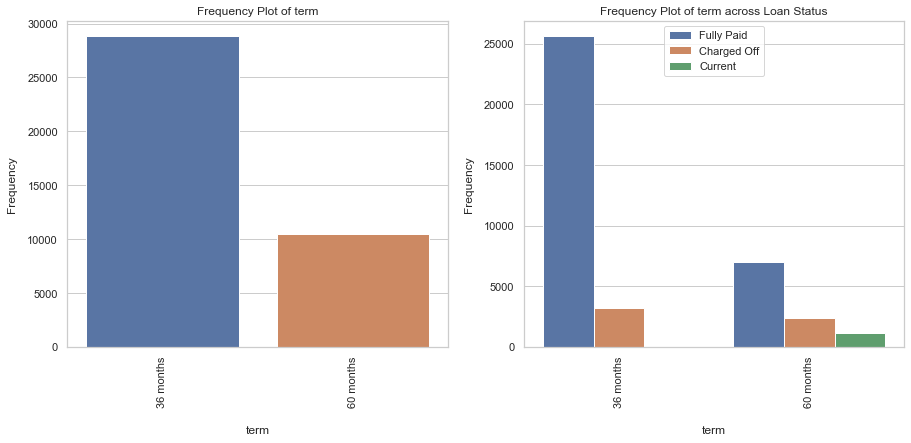

In [68]:
# Rank Frequency plot of term
ser = loan.term.value_counts(dropna=False)
print(ser)
print('\n')

print(loan.groupby('loan_status').term.value_counts(dropna=False))
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Ordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=6, 
                subplot_x=1, 
                subplot_y=2,
                xlabel='term',
                ylabel='Frequency', 
                x_axis='term',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=90)

Charged off applicants apply comparitively more for 36 months loan term than for 60 months

B    11925
A    10018
C     8015
D     5244
E     2786
F     1025
G      306
Name: grade, dtype: int64


loan_status  grade
Charged Off  B         1414
             C         1342
             D         1112
             E          704
             A          601
             F          312
             G           99
Current      B          344
             C          262
             D          216
             E          176
             F           71
             A           40
             G           17
Fully Paid   B        10167
             A         9377
             C         6411
             D         3916
             E         1906
             F          642
             G          190
Name: grade, dtype: int64




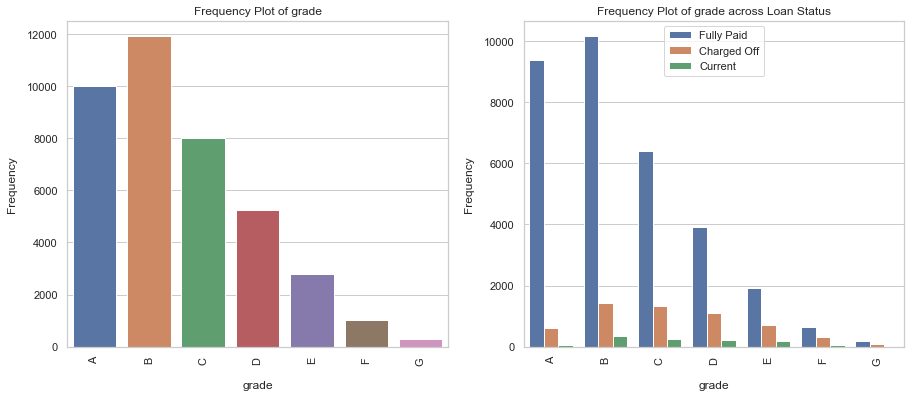

In [71]:
# Rank Frequency plot of grade
ser = loan.grade.value_counts(dropna=False)
print(ser)
print('\n')

print(loan.groupby('loan_status').grade.value_counts(dropna=False))
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Ordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=6, 
                subplot_x=1, 
                subplot_y=2,
                xlabel='grade',
                ylabel='Frequency', 
                x_axis='grade',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=90)

Most of the charged applicants apply for grade B , C and D

B3    2884
A4    2867
A5    2721
B5    2689
B4    2499
C1    2113
B2    2034
C2    1992
B1    1819
A3    1799
C3    1510
A2    1499
D2    1330
C4    1229
C5    1171
D3    1159
A1    1132
D4     970
D1     923
D5     862
E1     752
E2     646
E3     542
E4     447
E5     399
F1     322
F2     247
F3     179
F4     165
F5     112
G1     102
G2      75
G4      53
G3      47
G5      29
Name: sub_grade, dtype: int64




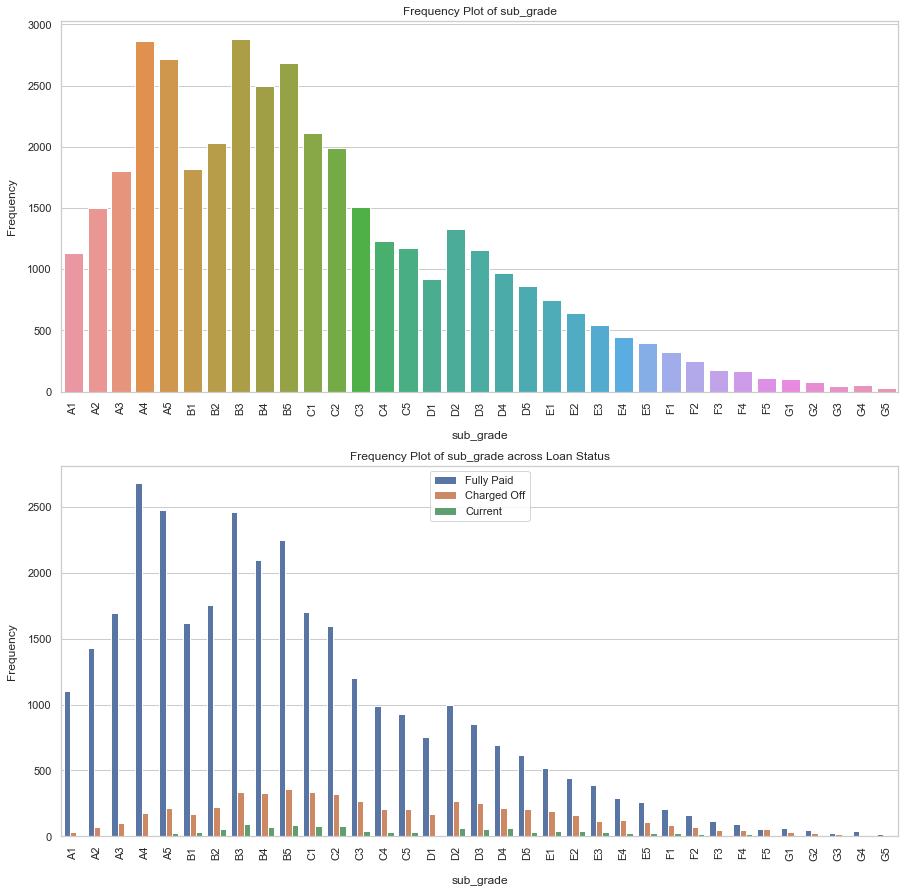

In [73]:
# Rank Frequency plot of sub_grade
ser = loan.sub_grade.value_counts(dropna=False)
print(ser)
print('\n')


plot_univariate(category='Categorical', 
                plot_type='Ordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=15, 
                subplot_x=2, 
                subplot_y=1,
                xlabel='sub_grade',
                ylabel='Frequency', 
                x_axis='sub_grade',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=90)

Initial Univariate Analysis says, of the Grade B, C and D, most of the Charged off applicants belong to Sub Grades:
    1. Grade B => B3, B5, B4
    2. Grade C => C3, C4, C5
    3. Grade D => D3, D4, D5

10+ years    8740
< 1 year     4553
2 years      4342
3 years      4059
4 years      3410
5 years      3255
1 year       3213
6 years      2209
7 years      1759
8 years      1462
9 years      1247
NaN          1070
Name: emp_length, dtype: int64


loan_status  emp_length
Charged Off  10+ years     1316
             < 1 year       635
             2 years        561
             3 years        551
             4 years        456
             5 years        456
             1 year         455
             6 years        305
             7 years        262
             NaN            227
             8 years        203
             9 years        157
Current      10+ years      386
             2 years         97
             4 years         94
             5 years         87
             3 years         82
             < 1 year        74
             1 year          69
             7 years         62
             6 years         58
             8 years         43
             NaN       

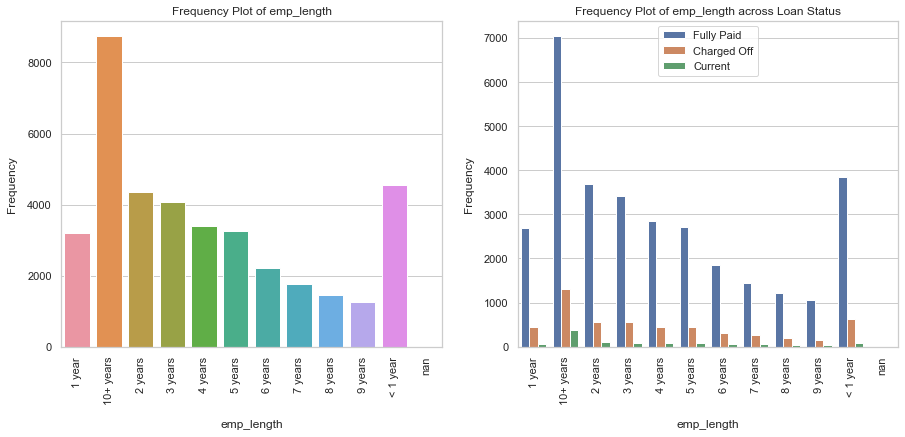

In [74]:
# Rank Frequency plot of emp_length
ser = loan.emp_length.value_counts(dropna=False)
print(ser)
print('\n')

print(loan.groupby('loan_status').emp_length.value_counts(dropna=False))
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Ordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=6, 
                subplot_x=1, 
                subplot_y=2,
                xlabel='emp_length',
                ylabel='Frequency', 
                x_axis='emp_length',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                xlabel_rotation=90)

Most of the Charged Off borrowers has employment length:
1. 10+ years
2. < 1 year

2011    21444
2010    11413
2009     4663
2008     1552
2007      247
Name: issue_yr, dtype: int64


loan_status  issue_yr
Charged Off  2011         3239
             2010         1466
             2009          590
             2008          246
             2007           43
Current      2011         1126
Fully Paid   2011        17079
             2010         9947
             2009         4073
             2008         1306
             2007          204
Name: issue_yr, dtype: int64




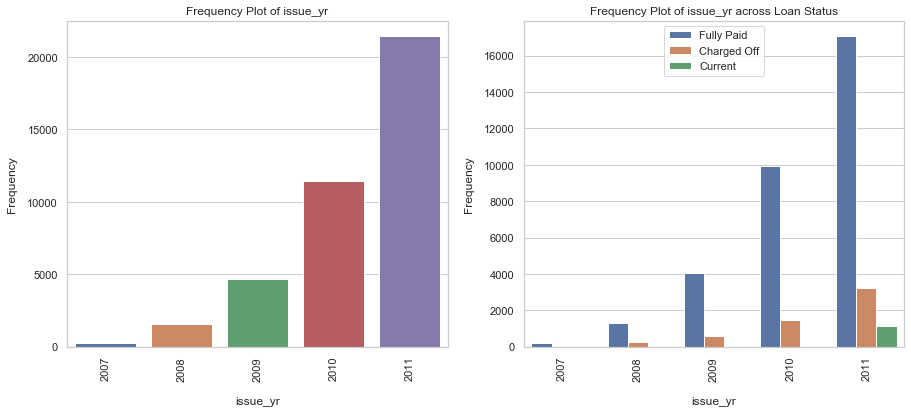

In [76]:
# Rank Frequency plot of issue_yr
ser = loan.issue_yr.value_counts(dropna=False)
print(ser)
print('\n')

print(loan.groupby('loan_status').issue_yr.value_counts(dropna=False))
print('\n')

plot_univariate(category='Categorical', 
                plot_type='Ordered Categorical', 
                series=ser, 
                figsize_x=15,
                figsize_y=6, 
                subplot_x=1, 
                subplot_y=2,
                xlabel='issue_yr',
                ylabel='Frequency', 
                x_axis='issue_yr',
                hue='loan_status',
                data=loan, 
                legend='upper center',
                 xlabel_rotation=90)

Charged Off Applicants are more in the Loan issued year 2011.

##### For Quantitative Variables - 
    1. funded_amnt
    2. int_rate
    3. installment
    4. annual_inc
    5. dti

In [77]:
order_list = ['Charged Off', 'Current', 'Fully Paid']

count   39319.0000
mean    10865.9567
std      7108.6803
min       500.0000
25%      5300.0000
50%      9600.0000
75%     15000.0000
max     35000.0000
Name: funded_amnt, dtype: float64


                 count       mean       std       min        25%        50%        75%        max
loan_status                                                                                      
Charged Off  5584.0000 11696.1363 7719.8568  900.0000  5500.0000 10000.0000 16000.0000 35000.0000
Current      1126.0000 16382.7709 8128.7521 1000.0000 11343.7500 15000.0000 21112.5000 35000.0000
Fully Paid  32609.0000 10533.2983 6867.9559  500.0000  5000.0000  9000.0000 14400.0000 35000.0000




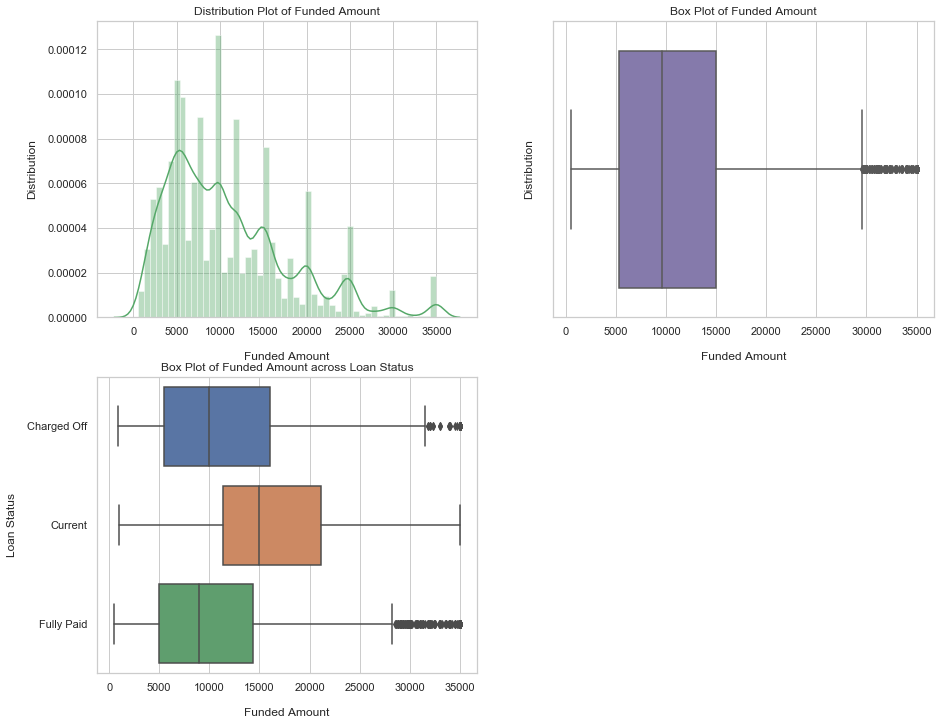

In [79]:
#  Distribution and Box Plots of Quantitative Variable: funded_amnt

print(loan.funded_amnt.describe())
print('\n')
print(loan.groupby(by = 'loan_status').funded_amnt.describe().sort_index())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "Funded Amount",
                ylabel = "Distribution",
                x_axis = 'funded_amnt',
                hue = 'loan_status',
                data = loan,
                legend = 'best',
                xlabel_rotation = 0)

##### It can be seen from the above description that Charged Off loan_status has median funded_amount as around 10000 , First Quartile (25%) as 5500 & Third Quartile (75%) as 16000

### Measure of Central Tendency
From the above description , we can observe that mean of funded amount is greater than the median which means our distribution is positively skewed or right skewed , that maybe due the outliers present. So , <b>Median</b> should be used as a measure of Central tendency as it does not gets affected by any outliers.

count   39319.0000
mean       12.0061
std         3.7174
min         5.4200
25%         9.2500
50%        11.8300
75%        14.5400
max        24.5900
Name: int_rate, dtype: float64


                 count    mean    std    min     25%     50%     75%     max
loan_status                                                                 
Charged Off  5584.0000 13.8086 3.6487 5.4200 11.2800 13.5700 16.4000 24.4000
Current      1126.0000 15.0009 3.5984 6.0000 11.9900 14.6500 17.8875 24.5900
Fully Paid  32609.0000 11.5941 3.5917 5.4200  8.4900 11.4900 13.9800 24.1100




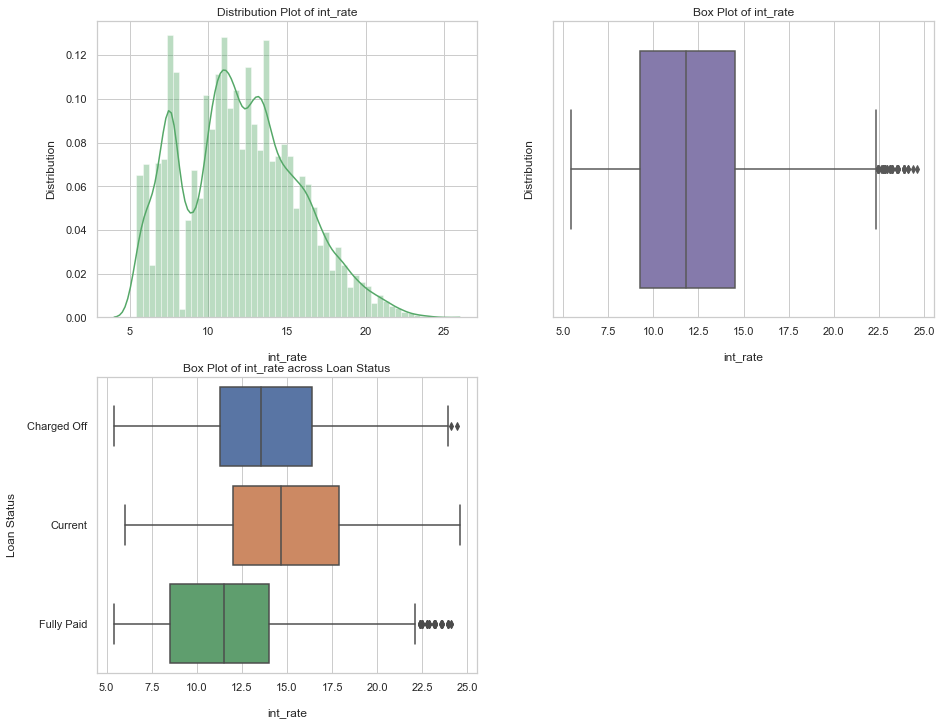

In [80]:
#  Distribution and Box Plots of Quantitative Variable: int_rate

print(loan.int_rate.describe())
print('\n')
print(loan.groupby(by = 'loan_status').int_rate.describe().sort_index())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "int_rate",
                ylabel = "Distribution",
                x_axis = 'int_rate',
                hue = 'loan_status',
                data = loan,
                legend = 'best',
                xlabel_rotation = 0)

##### It can be seen from the above description that Charged Off loan_status has median int_rate as around 13.57 , First Quartile (25%) as 11.28 & Third Quartile (75%) as 16.4


count   39319.0000
mean      322.0177
std       206.2062
min        15.6900
25%       166.1900
50%       278.9200
75%       426.1000
max      1305.1900
Name: installment, dtype: float64


                 count     mean      std     min      25%      50%      75%       max
loan_status                                                                          
Charged Off  5584.0000 334.2772 215.3098 22.7900 168.4500 292.0350 454.3750 1305.1900
Current      1126.0000 392.6293 202.7272 21.7400 257.3000 367.2900 518.2175  981.4500
Fully Paid  32609.0000 317.4802 204.1989 15.6900 164.8500 273.7600 415.9200 1288.1000




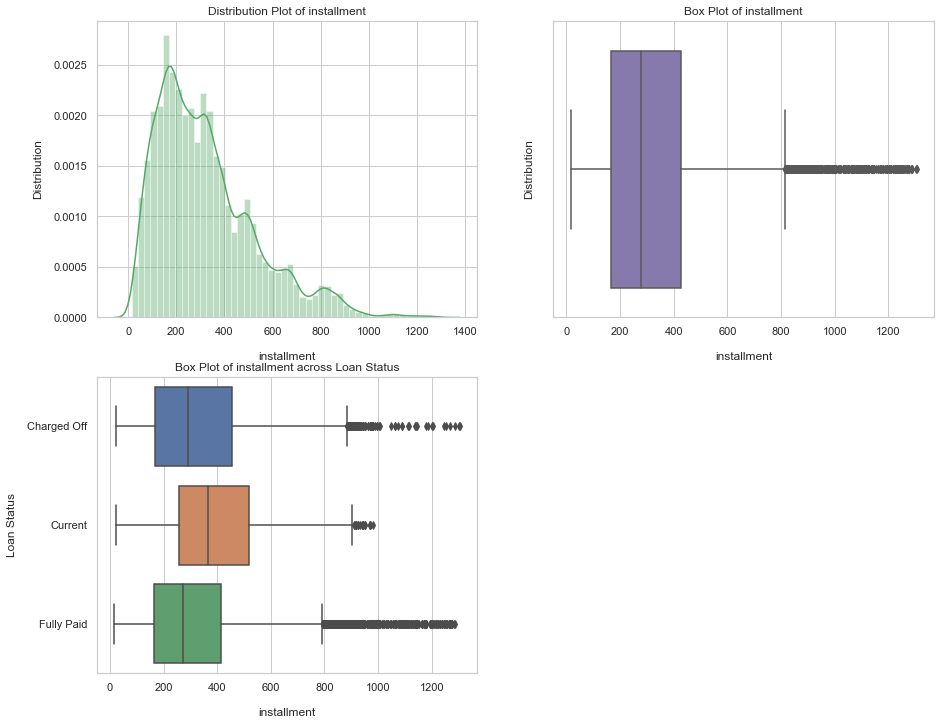

In [81]:
#  Distribution and Box Plots of Quantitative Variable: installment

print(loan.installment.describe())
print('\n')
print(loan.groupby(by = 'loan_status').installment.describe().sort_index())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "installment",
                ylabel = "Distribution",
                x_axis = 'installment',
                hue = 'loan_status',
                data = loan,
                legend = 'best',
                xlabel_rotation = 0)

##### It can be seen from the above description that Charged Off loan_status has median installment as around 292 , First Quartile (25%) as 168 & Third Quartile (75%) as 454

count    39319.0000
mean     65524.2158
std      35215.8853
min       4000.0000
25%      40000.0000
50%      58000.0000
75%      81000.0000
max     234996.0000
Name: annual_inc, dtype: float64


                 count       mean        std       min        25%        50%        75%         max
loan_status                                                                                        
Charged Off  5584.0000 59840.8761 32833.5891 4080.0000 37000.0000 52800.0000 74879.0000 230000.0000
Current      1126.0000 72366.7515 36051.2511 9960.0000 47000.0000 64695.0000 89000.0000 215000.0000
Fully Paid  32609.0000 66261.1618 35471.7625 4000.0000 41000.0000 60000.0000 82404.0000 234996.0000




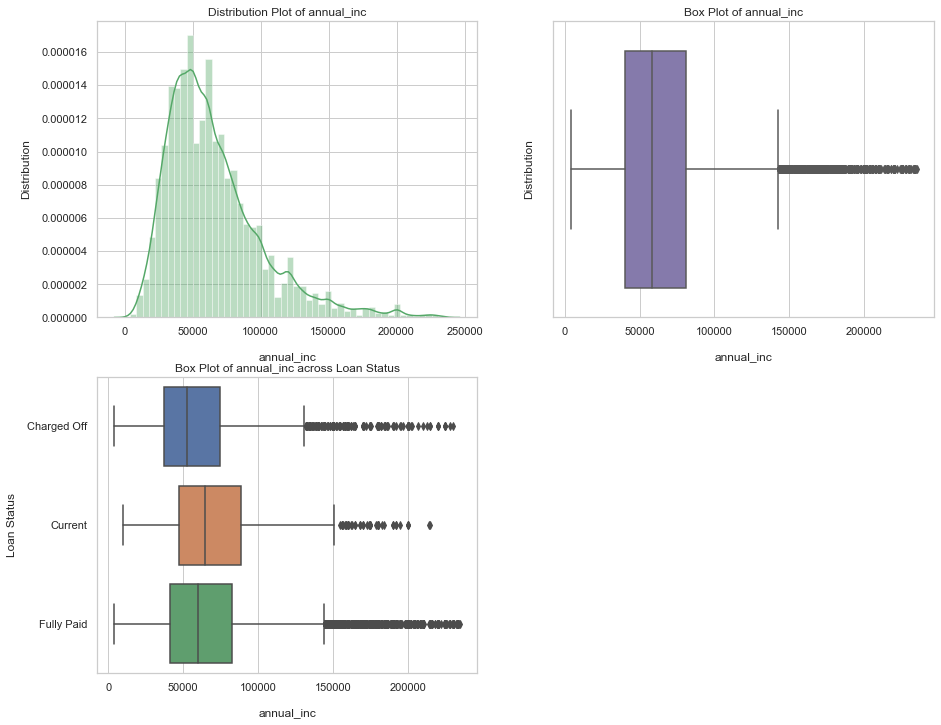

In [82]:
#  Distribution and Box Plots of Quantitative Variable: annual_inc

print(loan.annual_inc.describe())
print('\n')
print(loan.groupby(by = 'loan_status').annual_inc.describe().sort_index())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "annual_inc",
                ylabel = "Distribution",
                x_axis = 'annual_inc',
                hue = 'loan_status',
                data = loan,
                legend = 'best',
                xlabel_rotation = 0)

##### It can be seen from the above description that Charged Off loan_status has median annual_inc as around 52800 , First Quartile (25%) as 37000 & Third Quartile (75%) as 74879


count   39319.0000
mean       13.3766
std         6.6631
min         0.0000
25%         8.2700
50%        13.4800
75%        18.6400
max        29.9900
Name: dti, dtype: float64


                 count    mean    std    min    25%     50%     75%     max
loan_status                                                                
Charged Off  5584.0000 14.0450 6.5705 0.0000 9.1275 14.3400 19.3100 29.8500
Current      1126.0000 14.8388 6.6862 0.0000 9.8875 15.1050 20.1050 29.9500
Fully Paid  32609.0000 13.2117 6.6650 0.0000 8.0600 13.2700 18.4500 29.9900




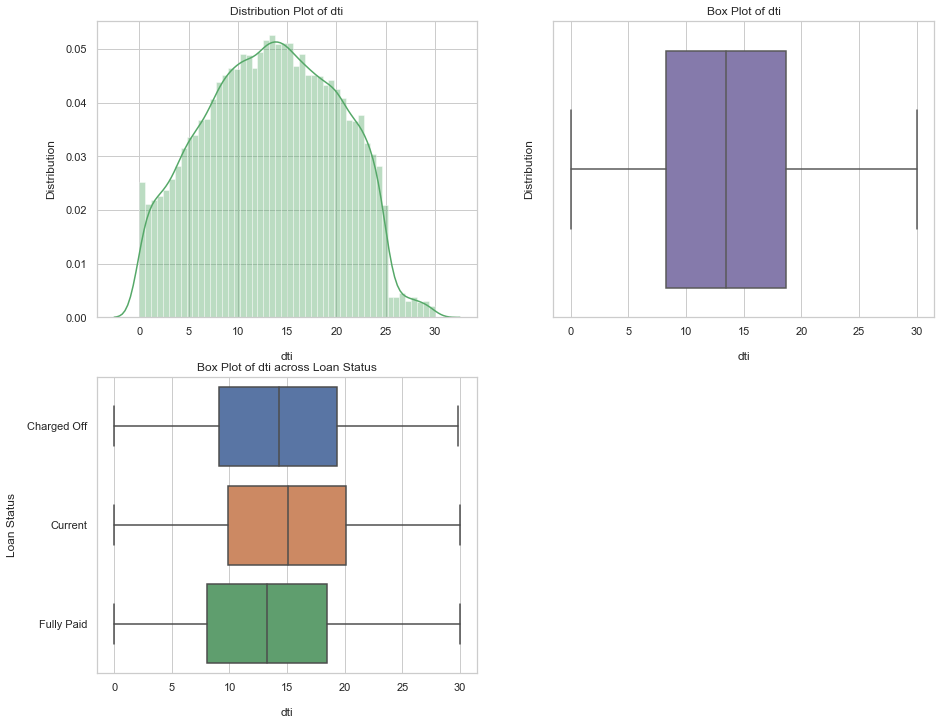

In [83]:
#  Distribution and Box Plots of Quantitative Variable: dti

print(loan.dti.describe())
print('\n')
print(loan.groupby(by = 'loan_status').dti.describe().sort_index())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "dti",
                ylabel = "Distribution",
                x_axis = 'dti',
                hue = 'loan_status',
                data = loan,
                legend = 'best',
                xlabel_rotation = 0)

##### It can be seen from the above description that Charged Off loan_status has median dti as around 14.3, First Quartile (25%) as 9.1 & Third Quartile (75%) as 19.3

### 4. Bivariate Analysis

    1. home_ownership
    2. purpose
    3. addr_state
    4. term
    5. grade
    6. sub_grade
    7. emp_length
    8. issue_yr
    9. funded_amnt
    10. int_rate_percent
    11. annual_inc
    12. installment
    13. dti

In [142]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# y_axis                -      The series/variable to be plotted along the y-axis.

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_bivariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, 
                   x_axis, y_axis, xlabel_rotation):
    
    legend = 'best'
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'darkblue')
    # Call Custom Function
    title = "Line Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
    
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Bar Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 3
    plt.subplot(subplot_x, subplot_y, 3)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'maroon')
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Joint Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    plt.tight_layout()
    plt.show()

In [107]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000,2011


loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
home_ownership                                                           
OTHER                    18        0          78     96           18.7500
RENT                   2824      416       15573  18813           15.0109
OWN                     440       82        2507   3029           14.5262
MORTGAGE               2302      628       14448  17378           13.2466
NONE                      0        0           3      3            0.0000


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             5.0000   5.0000      5.0000     5.0000            5.0000
mean           1116.8000 225.2000   6521.8000  7863.8000           12.3067
std            1344.6089 283.1028   7824.3977  9432.8040            7.1780
min               0.0000   0.0000      3.0000     3.0000            0.0000
25%              18.0000   0.0000     78.0000    96.0000           13.2466
50%             440.0000  82.0

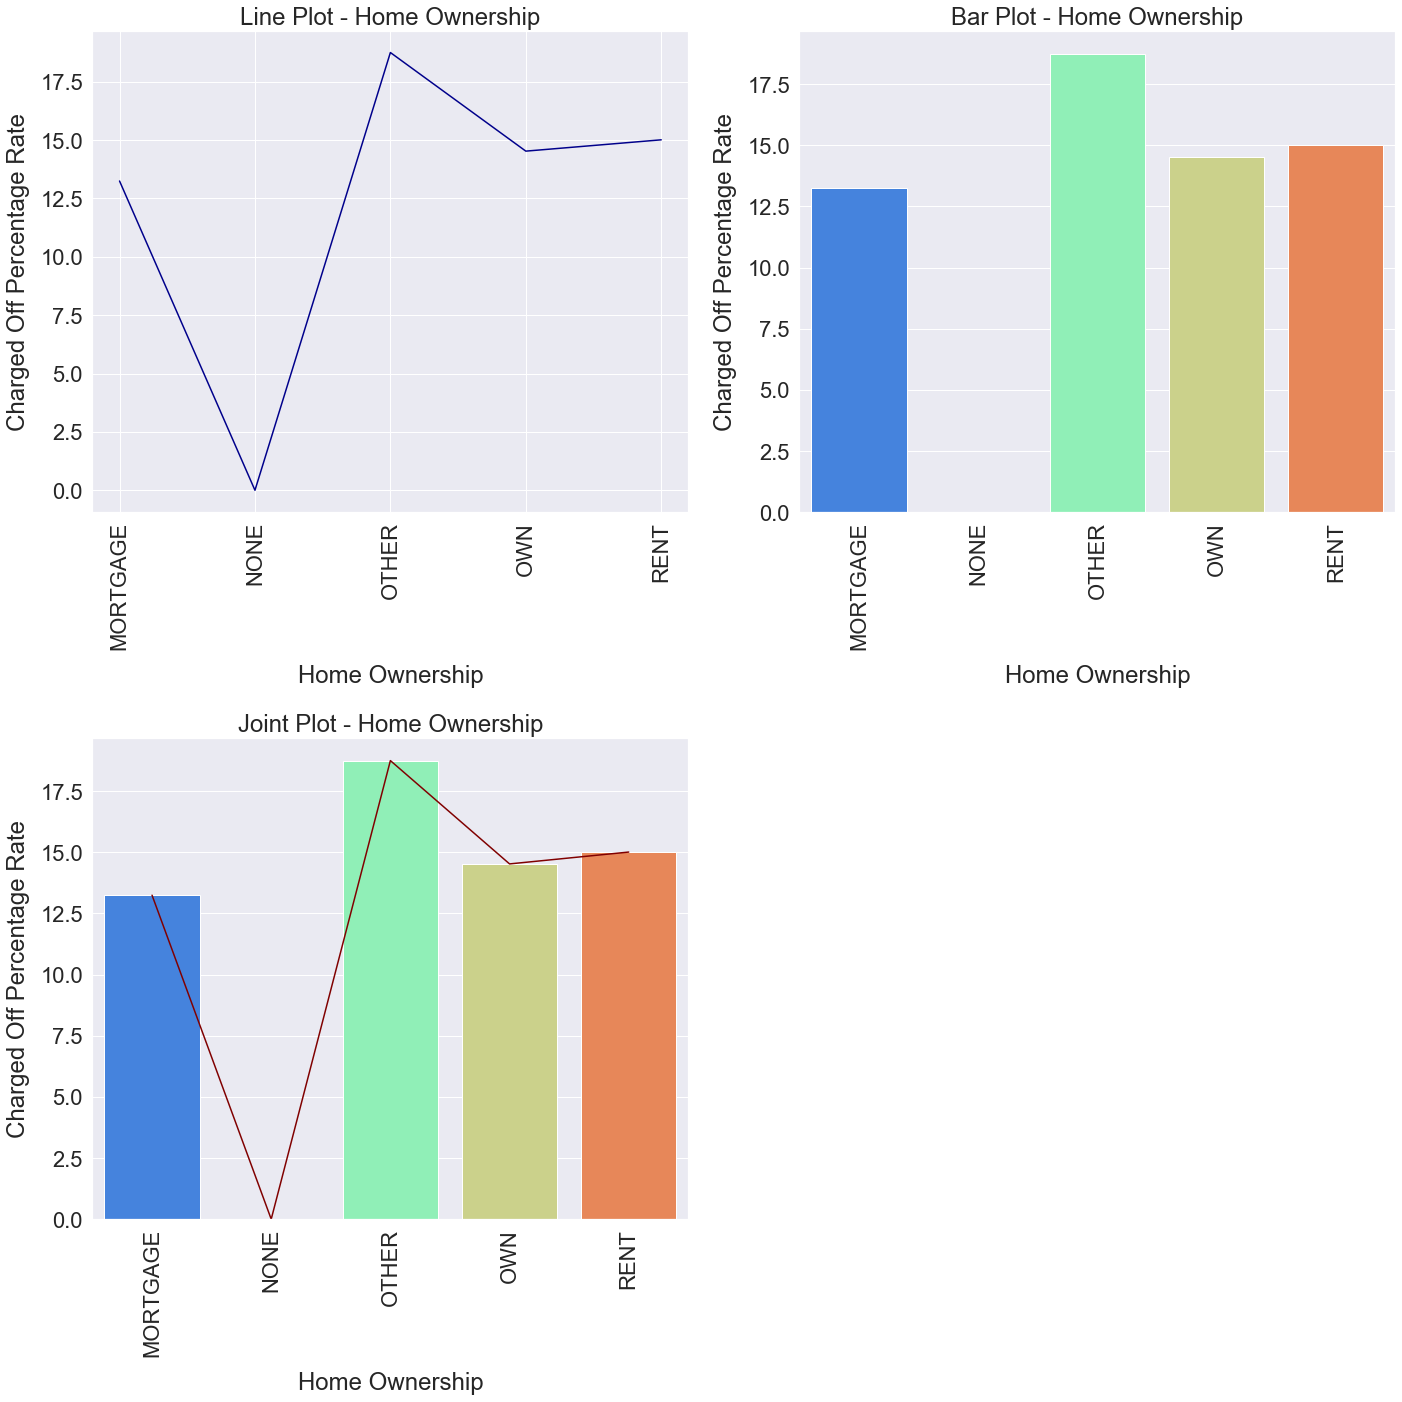

In [150]:
# home_ownership against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='home_ownership', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Home Ownership",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged off Rate - Top 3 Borrower's home ownershhip - 
1. Other - 18.7 
2. Rent - 15.0
3. Own - 14.5

loan_status         Charged Off  Current  Fully Paid  Total  Charged Off Rate
purpose                                                                      
small_business              472       74        1251   1797           26.2660
renewable_energy             19        1          81    101           18.8119
educational                  55        0         268    323           17.0279
other                       629      126        3203   3958           15.8919
moving                       91        7         479    577           15.7712
house                        58       14         299    371           15.6334
medical                     106       12         568    686           15.4519
debt_consolidation         2752      580       15165  18497           14.8781
vacation                     53        6         322    381           13.9108
home_improvement            338       97        2459   2894           11.6793
credit_card                 537      102        4450   5089     

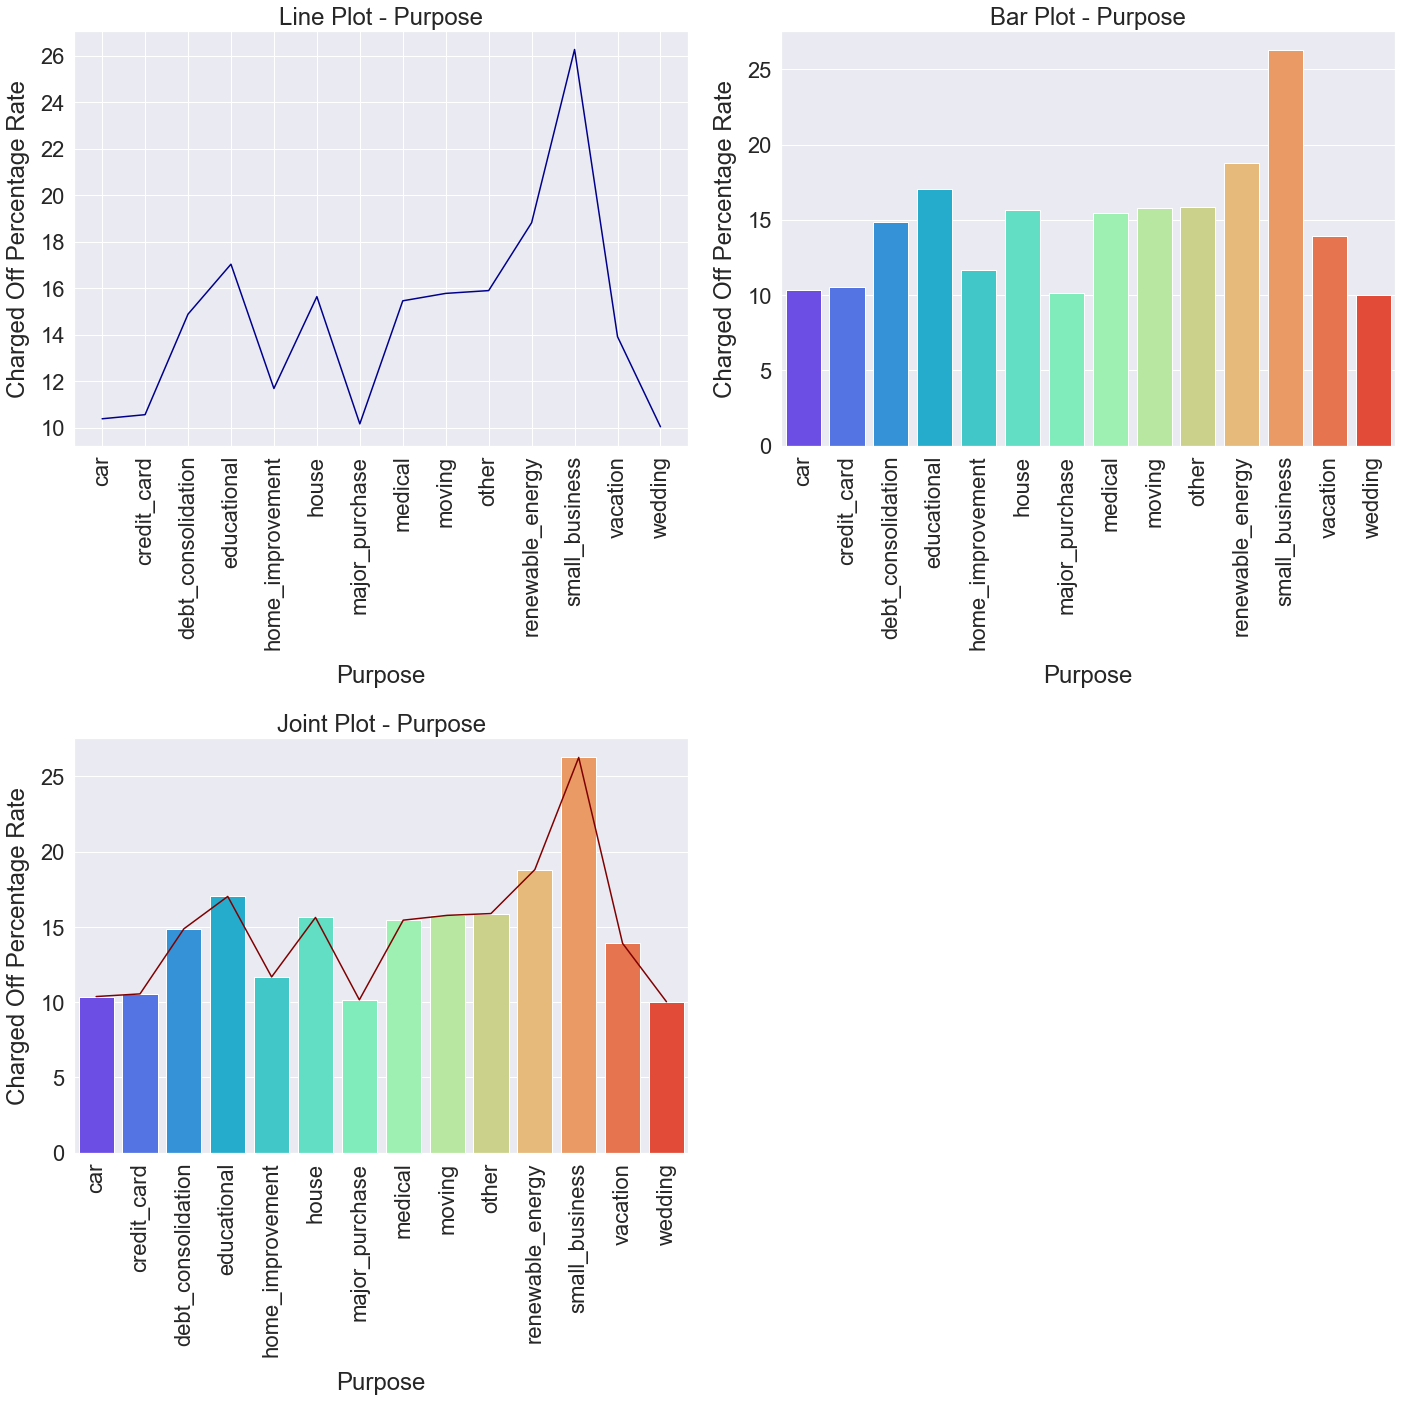

In [147]:
# purpose against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='purpose', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Purpose",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged off Rate - Top 3 Borrower's loan purpose- 
1. small_business -  26.26
2. renewable_energy - 18.81
3. educational - 17.02

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
addr_state                                                            
NE                     3        0           2      5           60.0000
NV                   107       17         368    492           21.7480
SD                    12        2          50     64           18.7500
AK                    14        2          63     79           17.7215
FL                   497       85        2252   2834           17.5371
MO                   114       16         551    681           16.7401
ID                     1        0           5      6           16.6667
NM                    30        5         149    184           16.3043
HI                    28        8         138    174           16.0920
CA                  1116      149        5767   7032           15.8703
OR                    71       16         364    451           15.7428
UT                    40        6         211    257           15.5642
MD    

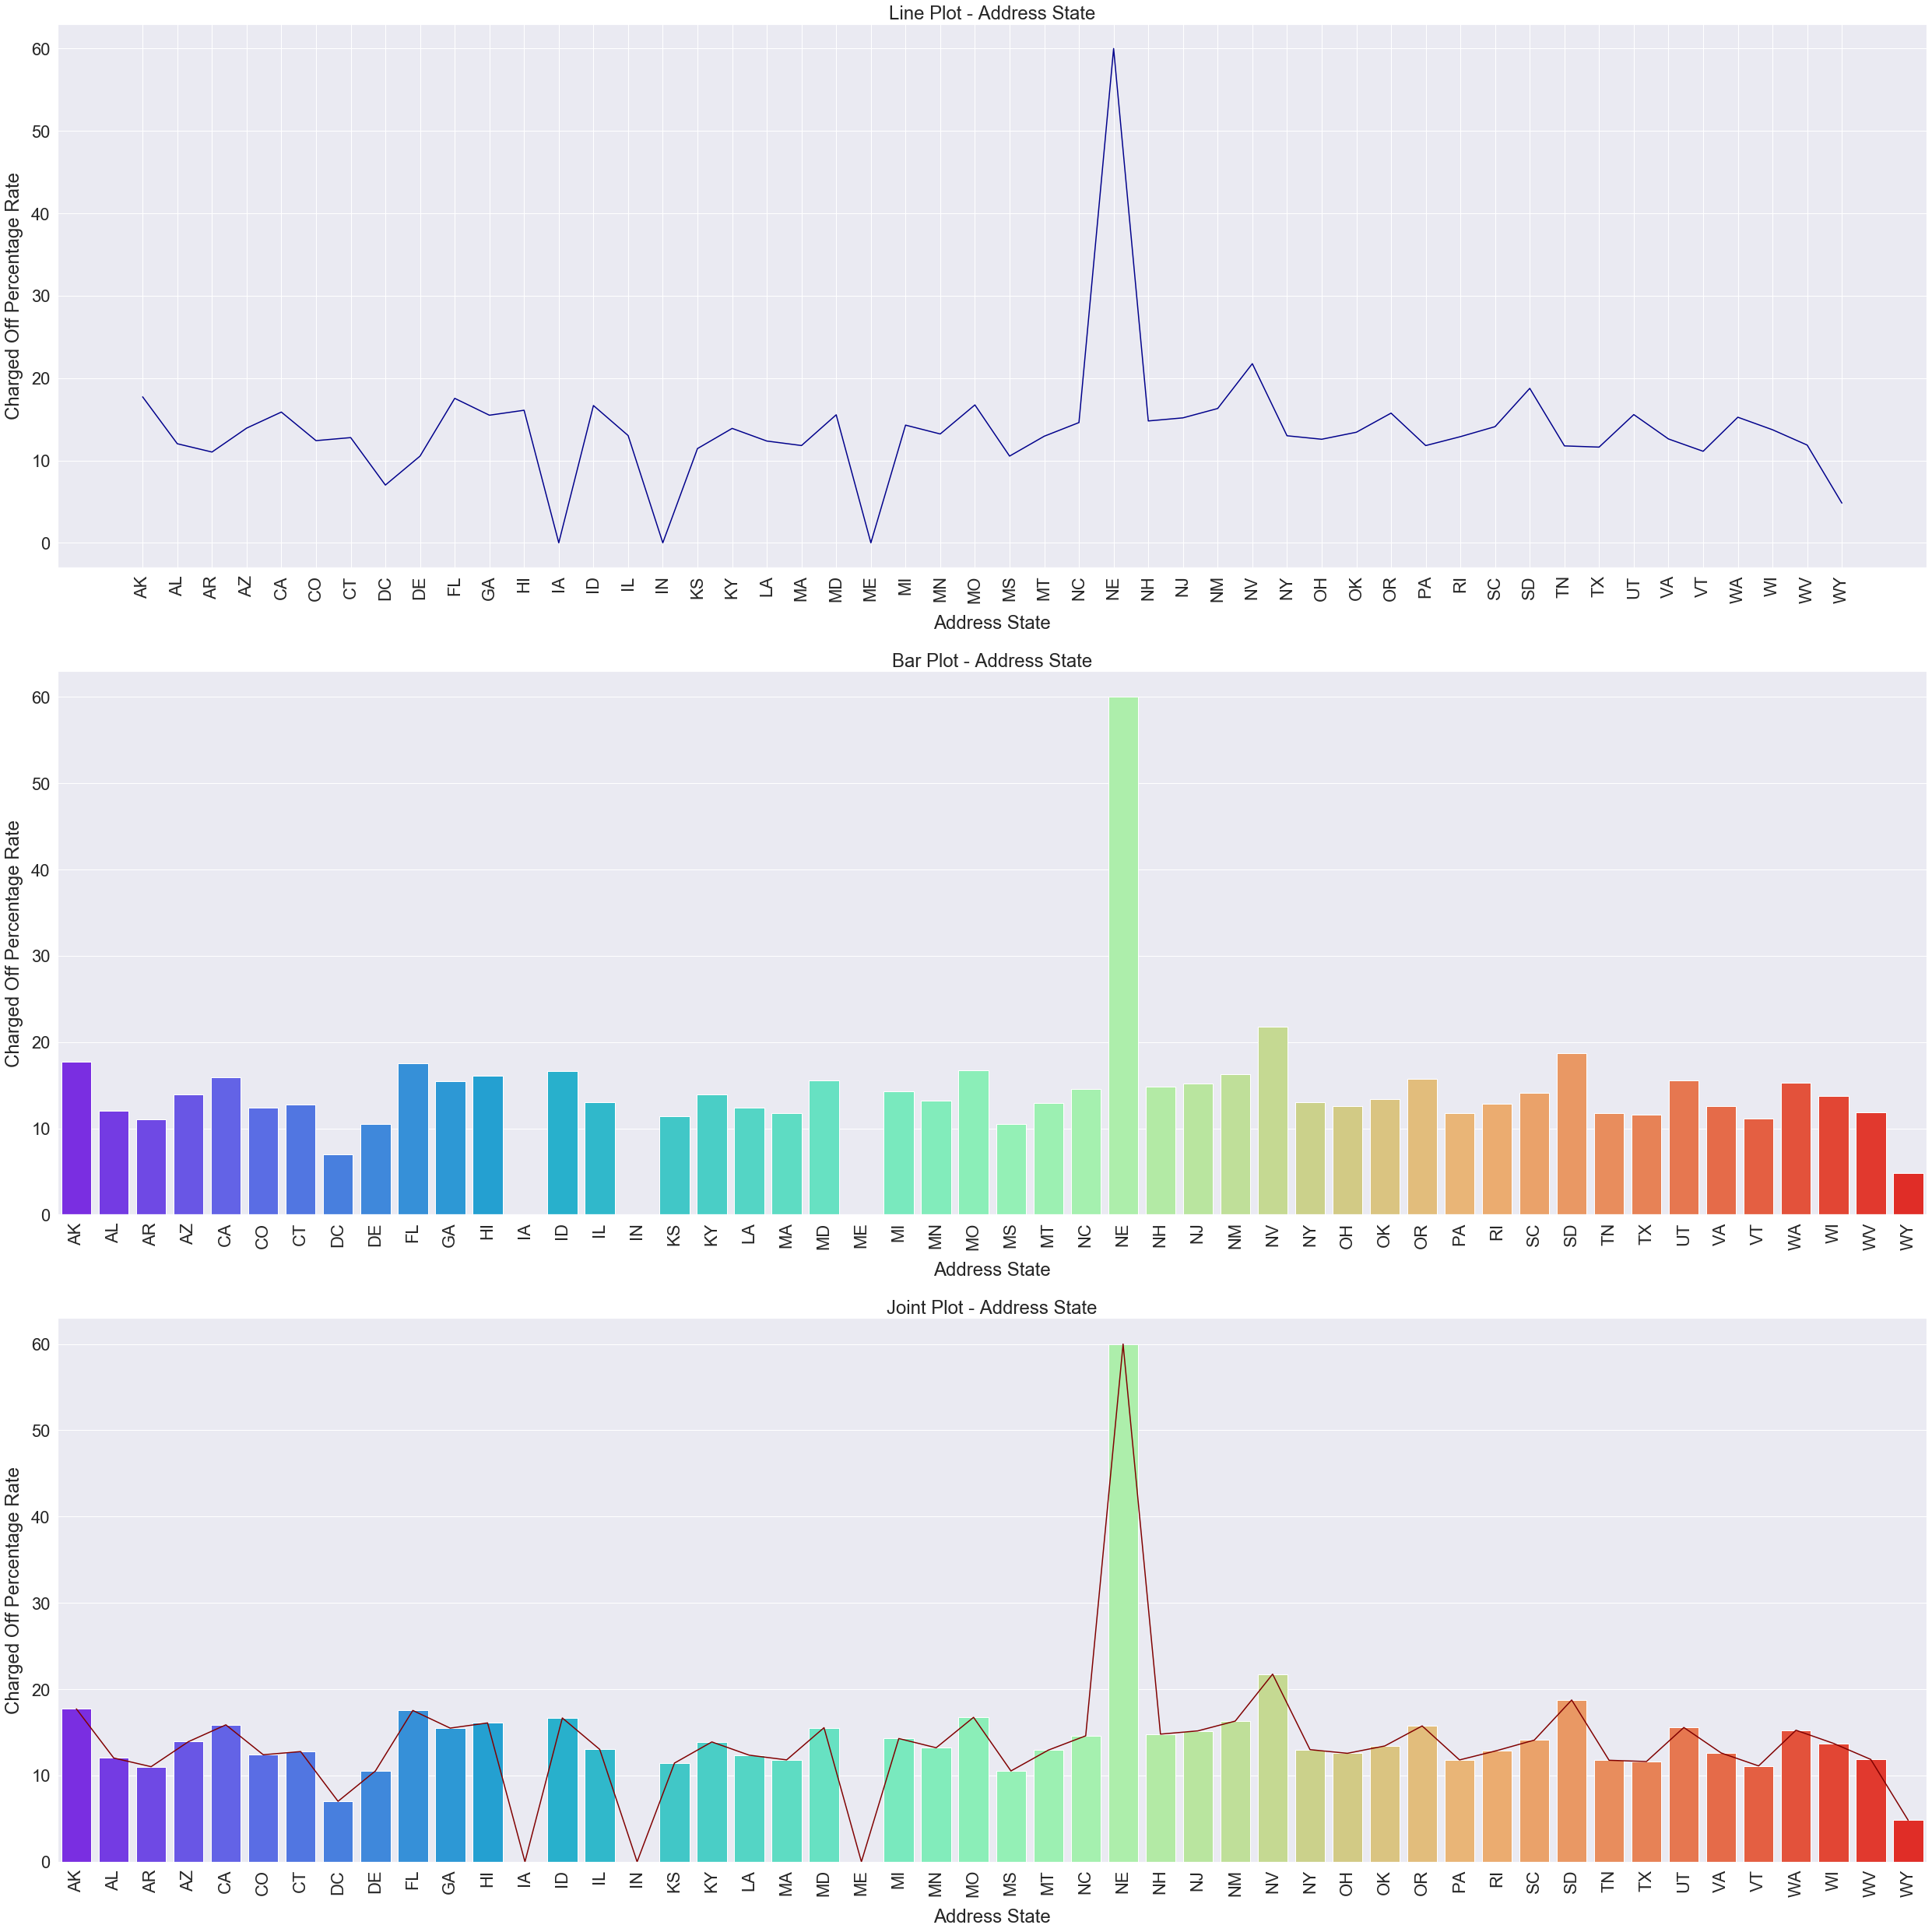

In [162]:
# addr_state against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='addr_state', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 35,
               figsize_y = 35,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Address State",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged Off Rate - Top 5 Borrower's Address State:
1. NE      = 60.00%
2. NV      = 21.75%
3. SD      = 18.75%
4. AK      = 17.72%
5. FL      = 17.54%

*NE has a total of 5 loans out of which 3 were charged-off.

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
term                                                                  
 60 months          2383     1126        6990  10499           22.6974
 36 months          3201        0       25619  28820           11.1069


loan_status  Charged Off   Current  Fully Paid      Total  Charged Off Rate
count             2.0000    2.0000      2.0000     2.0000            2.0000
mean           2792.0000  563.0000  16304.5000 19659.5000           16.9021
std             578.4133  796.2022  13172.6922 12954.9033            8.1957
min            2383.0000    0.0000   6990.0000 10499.0000           11.1069
25%            2587.5000  281.5000  11647.2500 15079.2500           14.0045
50%            2792.0000  563.0000  16304.5000 19659.5000           16.9021
75%            2996.5000  844.5000  20961.7500 24239.7500           19.7998
max            3201.0000 1126.0000  25619.0000 28820.0000           22.6974




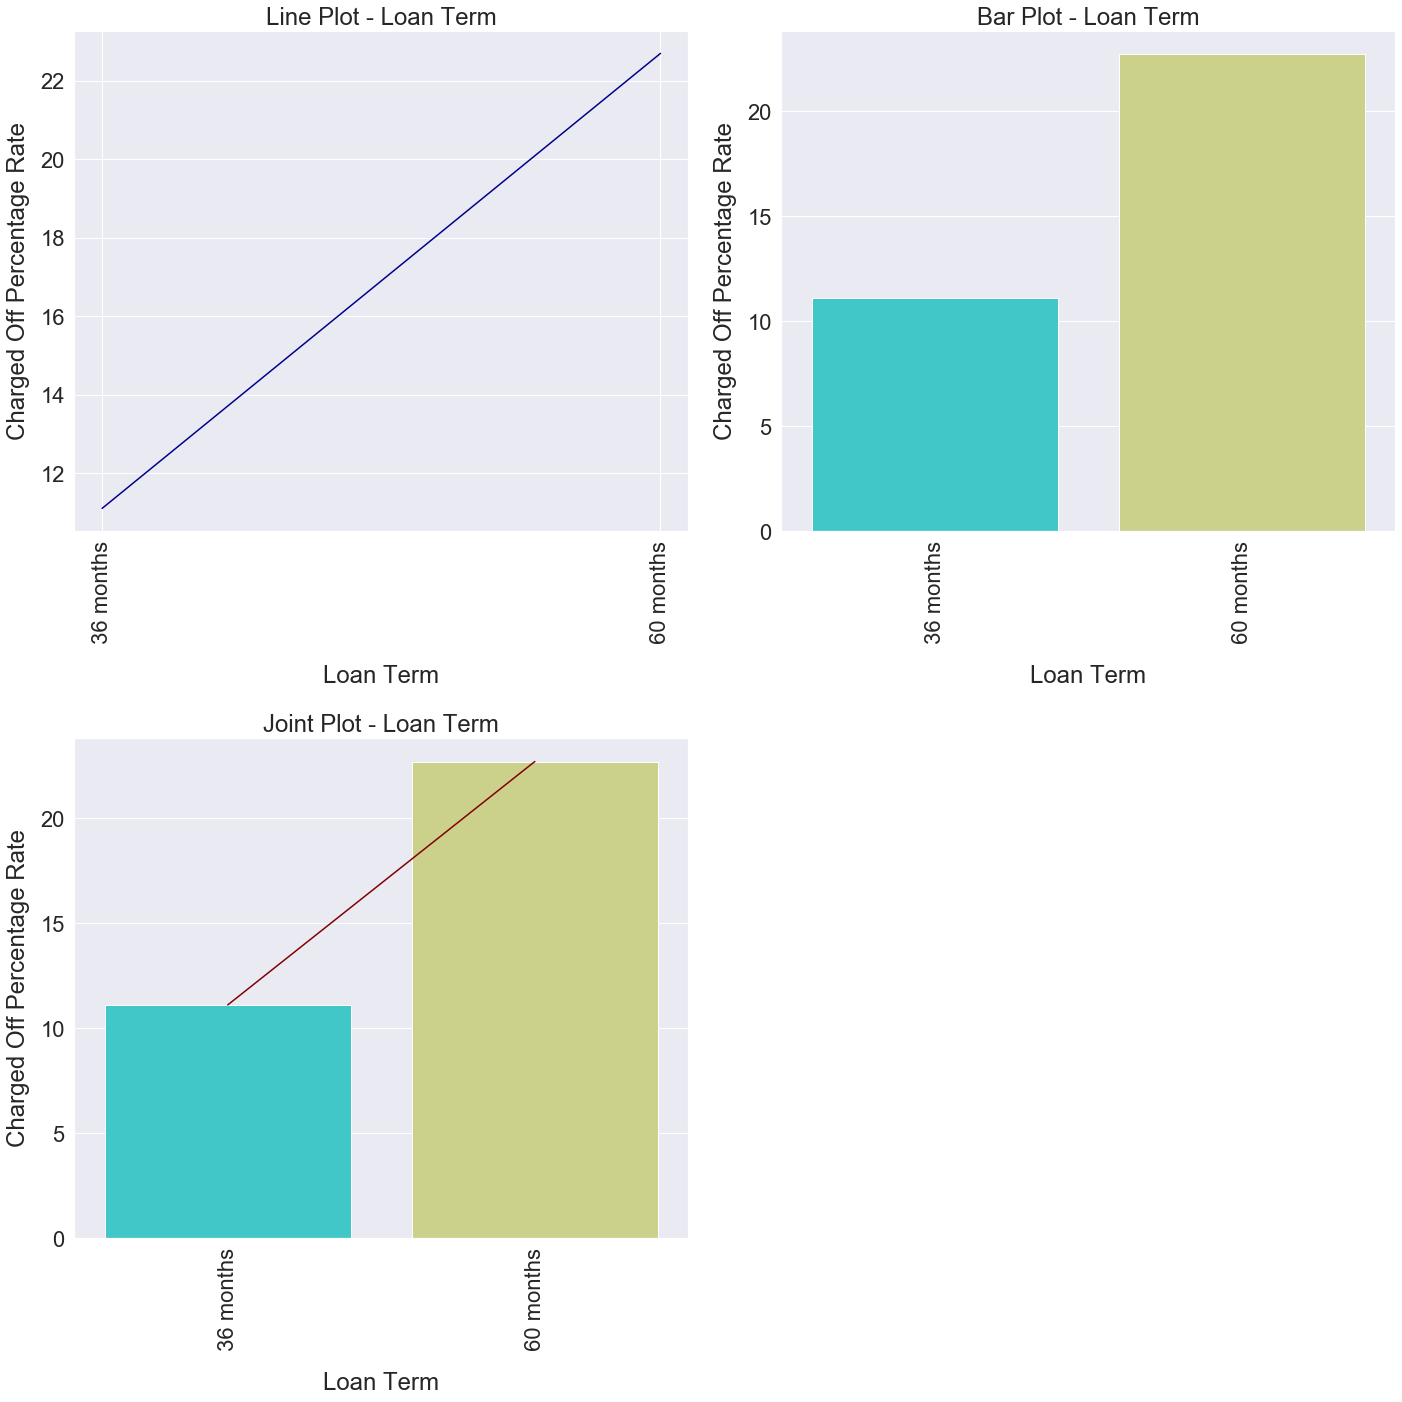

In [163]:
# term against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='term', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Loan Term",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged off rate is maximum for 60 months Borrower's Term

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
grade                                                                 
G                     99       17         190    306           32.3529
F                    312       71         642   1025           30.4390
E                    704      176        1906   2786           25.2692
D                   1112      216        3916   5244           21.2052
C                   1342      262        6411   8015           16.7436
B                   1414      344       10167  11925           11.8574
A                    601       40        9377  10018            5.9992


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             7.0000   7.0000      7.0000     7.0000            7.0000
mean            797.7143 160.8571   4658.4286  5617.0000           20.5524
std             507.6793 122.7578   4080.5718  4515.8414            9.6745
min              99.0000  17.0000    190.0000   306.0000   

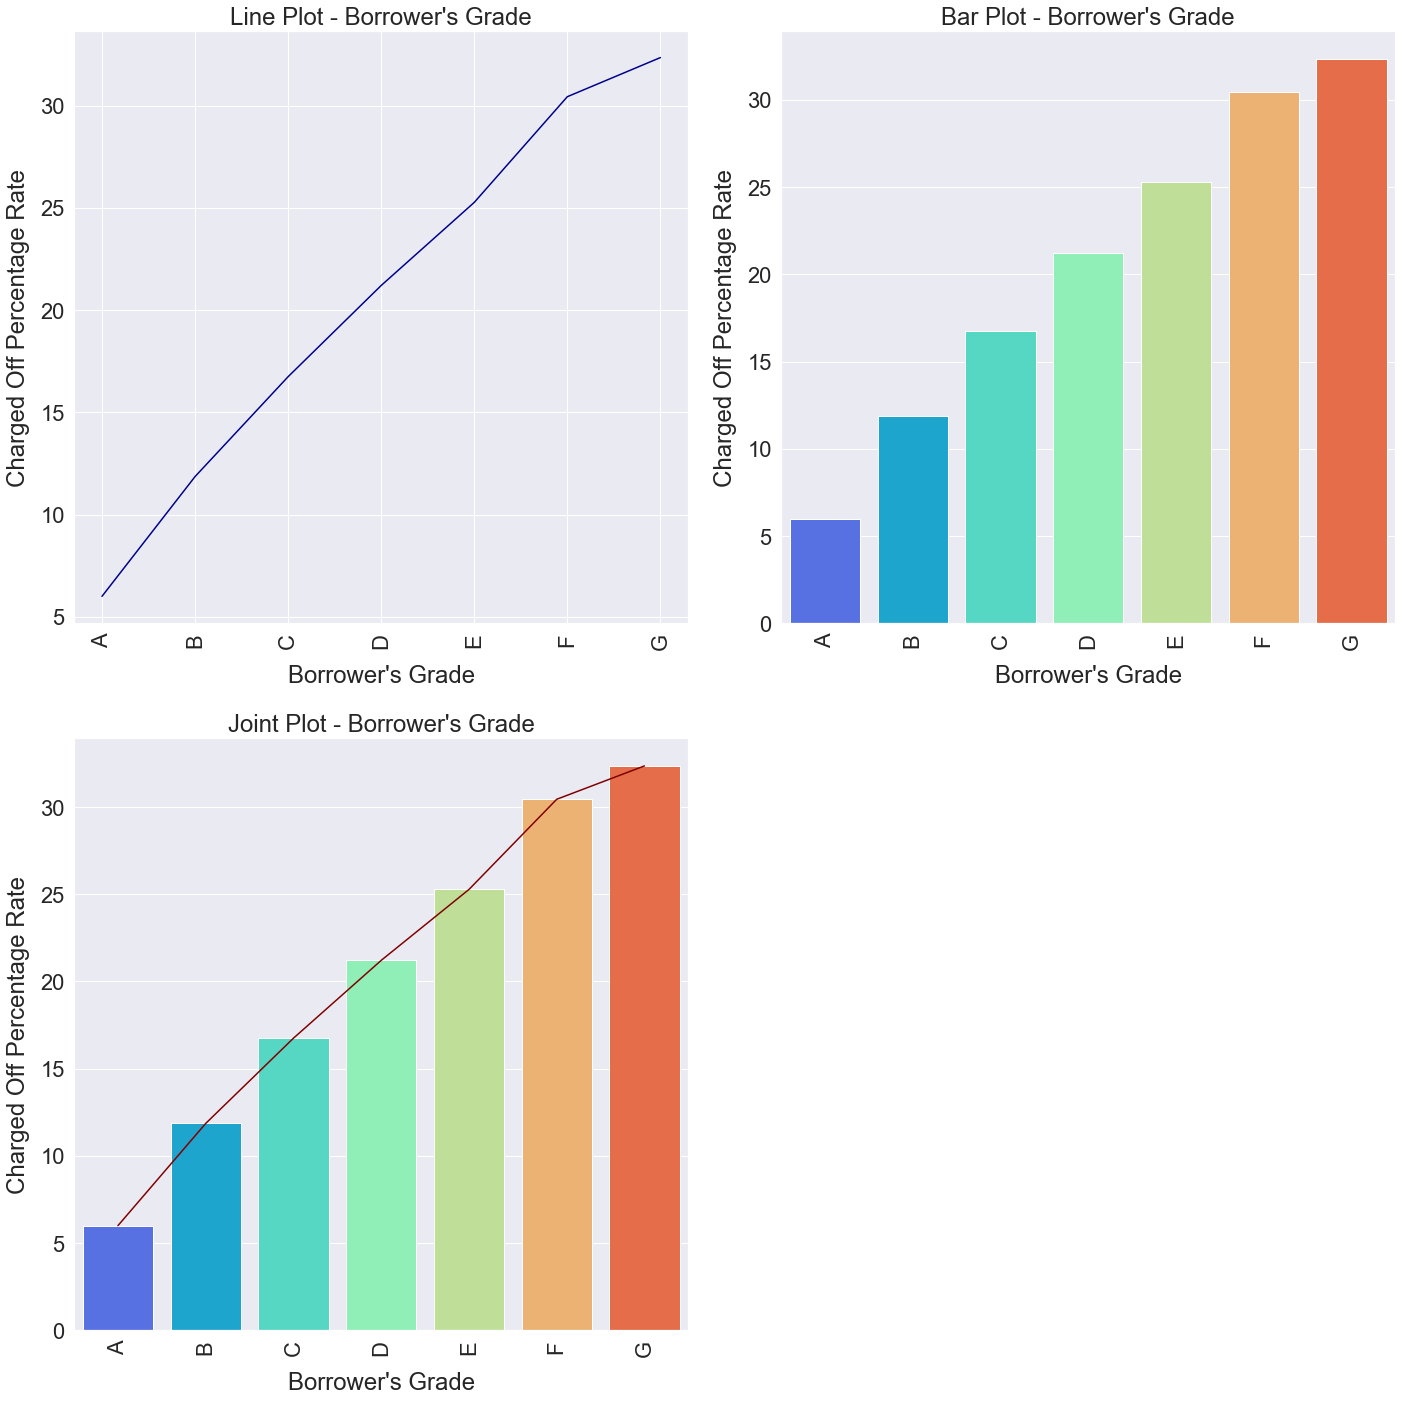

In [164]:
# grade against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='grade', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged Off Rate for Borrower's Grade - 
          In Order -> G >> F >> E >> D >> C >> B >> A

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
sub_grade                                                             
F5                    53        4          55    112           47.3214
G3                    19        3          25     47           40.4255
G2                    27        1          47     75           36.0000
G5                    10        1          18     29           34.4828
F4                    52       17          96    165           31.5152
G1                    31       10          61    102           30.3922
E4                   126       28         293    447           28.1879
F2                    69       16         162    247           27.9352
F3                    50       11         118    179           27.9330
F1                    88       23         211    322           27.3292
E5                   106       29         264    399           26.5664
E1                   195       40         517    752           25.9309
E2    

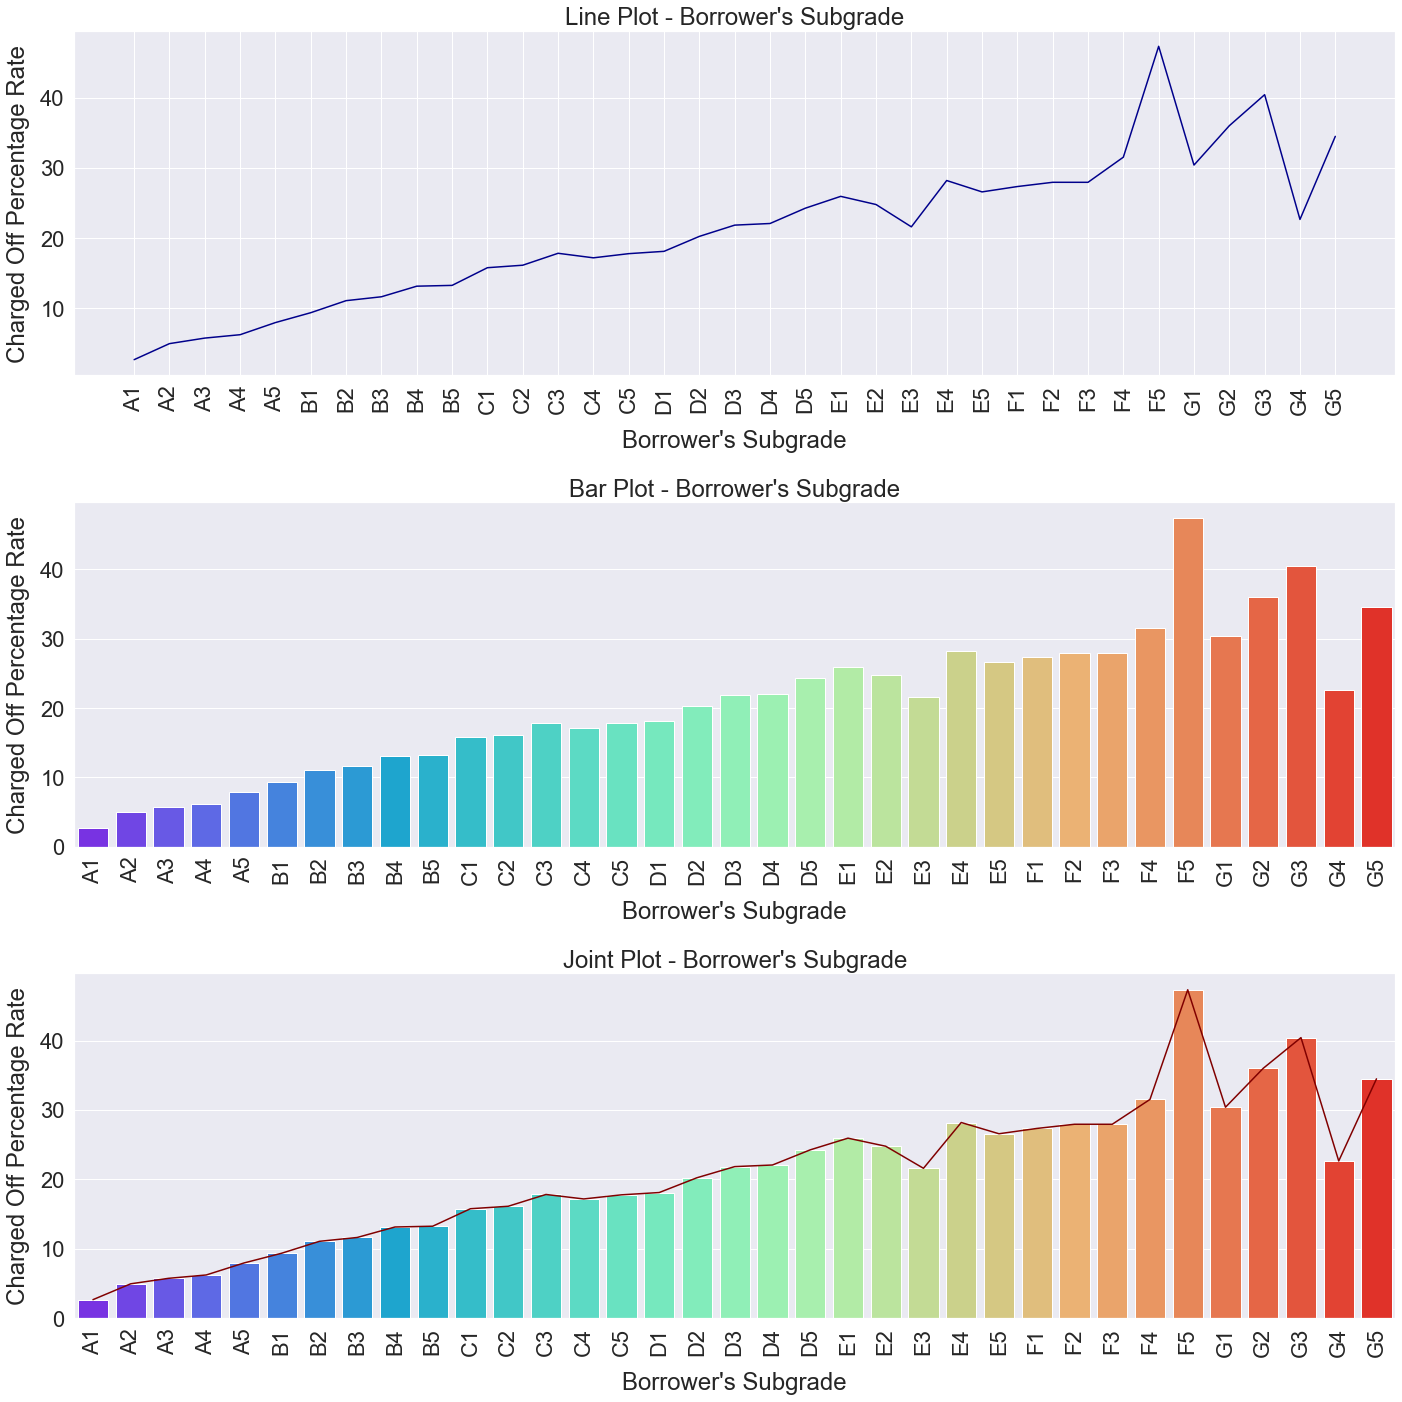

In [165]:
# sub_grade against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='sub_grade', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Borrower's Subgrade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged Off Rate - 
 Same as in case of 'Grades' 

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
emp_length                                                            
10+ years           1316      386        7038   8740           15.0572
7 years              262       62        1435   1759           14.8948
1 year               455       69        2689   3213           14.1612
5 years              456       87        2712   3255           14.0092
< 1 year             635       74        3844   4553           13.9468
8 years              203       43        1216   1462           13.8851
6 years              305       58        1846   2209           13.8072
3 years              551       82        3426   4059           13.5748
4 years              456       94        2860   3410           13.3724
2 years              561       97        3684   4342           12.9203
9 years              157       32        1058   1247           12.5902


loan_status  Charged Off  Current  Fully Paid     Total  Charged Off Rate
c

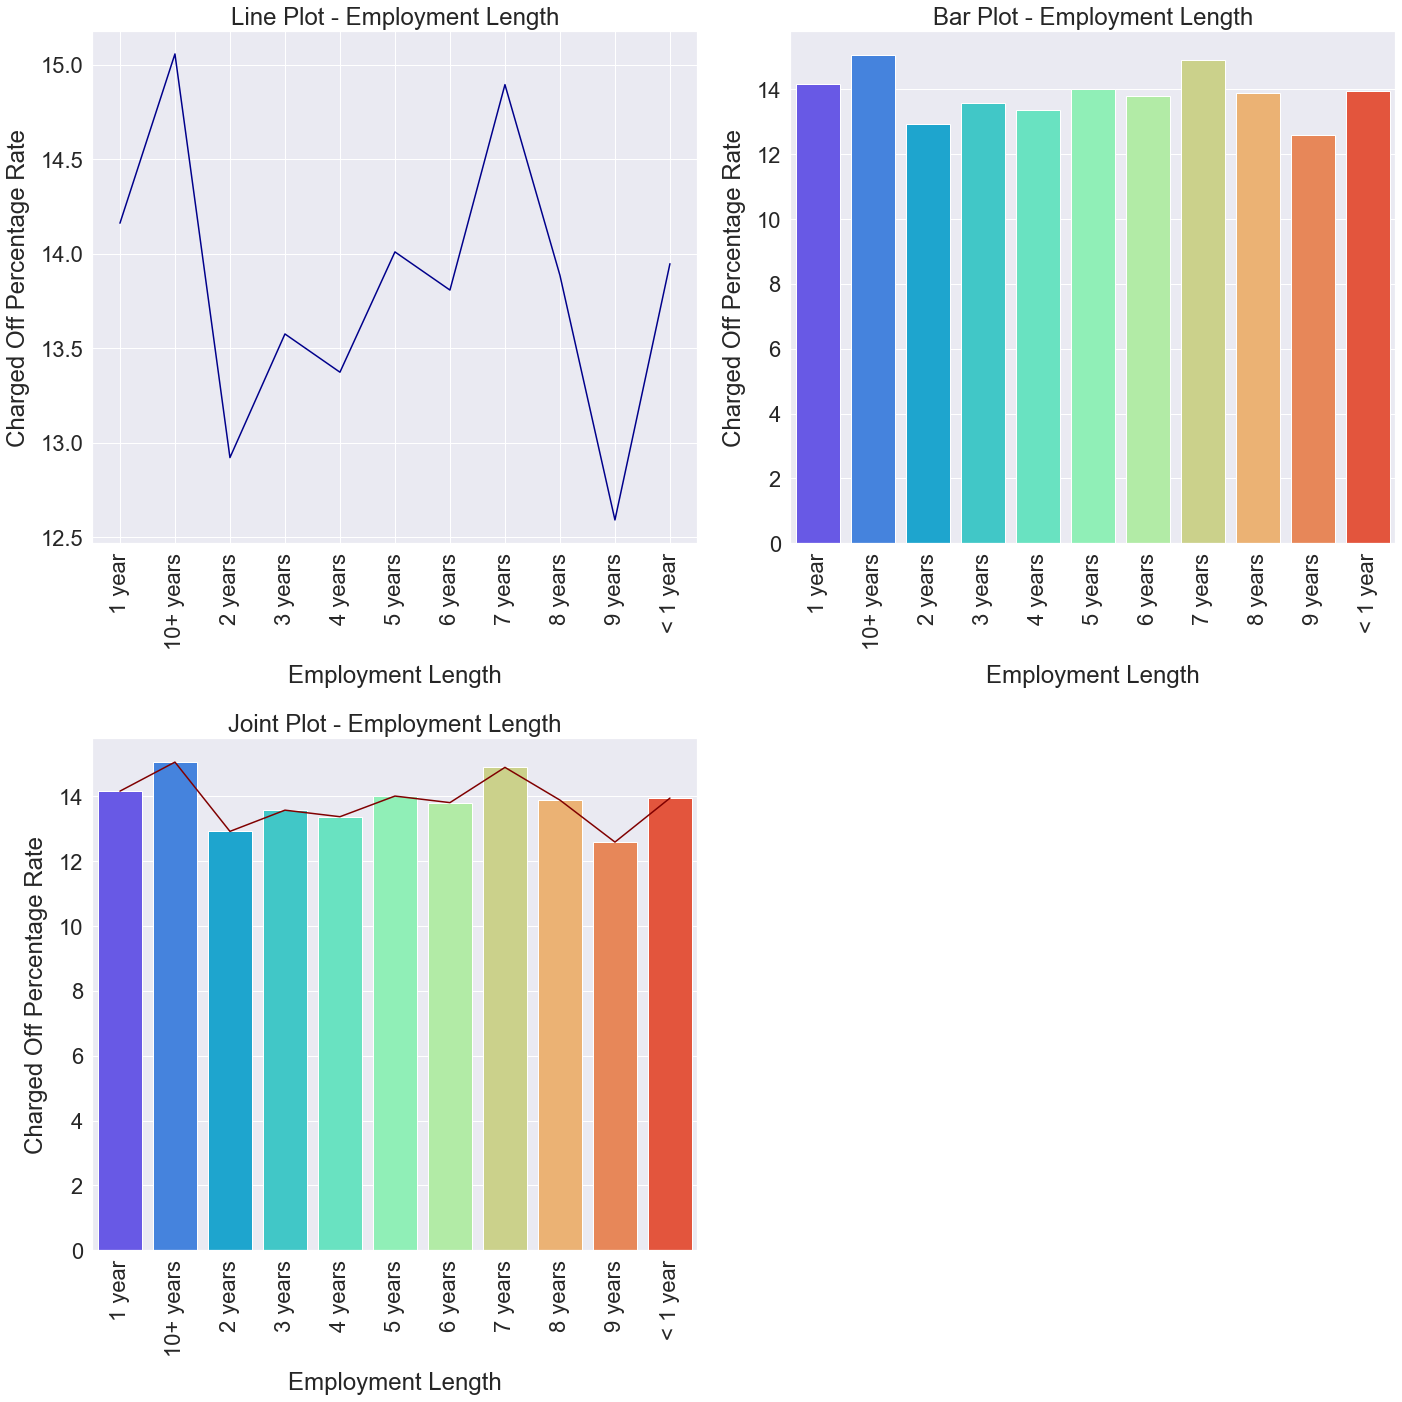

In [166]:
# emp_length against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='emp_length', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Employment Length",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

##### Charged off Rate for Borrower's Employment Length (top 3) 
1. 10 years (+10 years) - 15.05 
2. 7 years - 14.89 
3. 1 year - 14.16

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
issue_yr                                                              
2007                  43        0         204    247           17.4089
2008                 246        0        1306   1552           15.8505
2011                3239     1126       17079  21444           15.1045
2010                1466        0        9947  11413           12.8450
2009                 590        0        4073   4663           12.6528


loan_status  Charged Off   Current  Fully Paid      Total  Charged Off Rate
count             5.0000    5.0000      5.0000     5.0000            5.0000
mean           1116.8000  225.2000   6521.8000  7863.8000           14.7723
std            1305.2328  503.5625   7005.3953  8733.8170            2.0268
min              43.0000    0.0000    204.0000   247.0000           12.6528
25%             246.0000    0.0000   1306.0000  1552.0000           12.8450
50%             590.0000    0.0000   4073.000

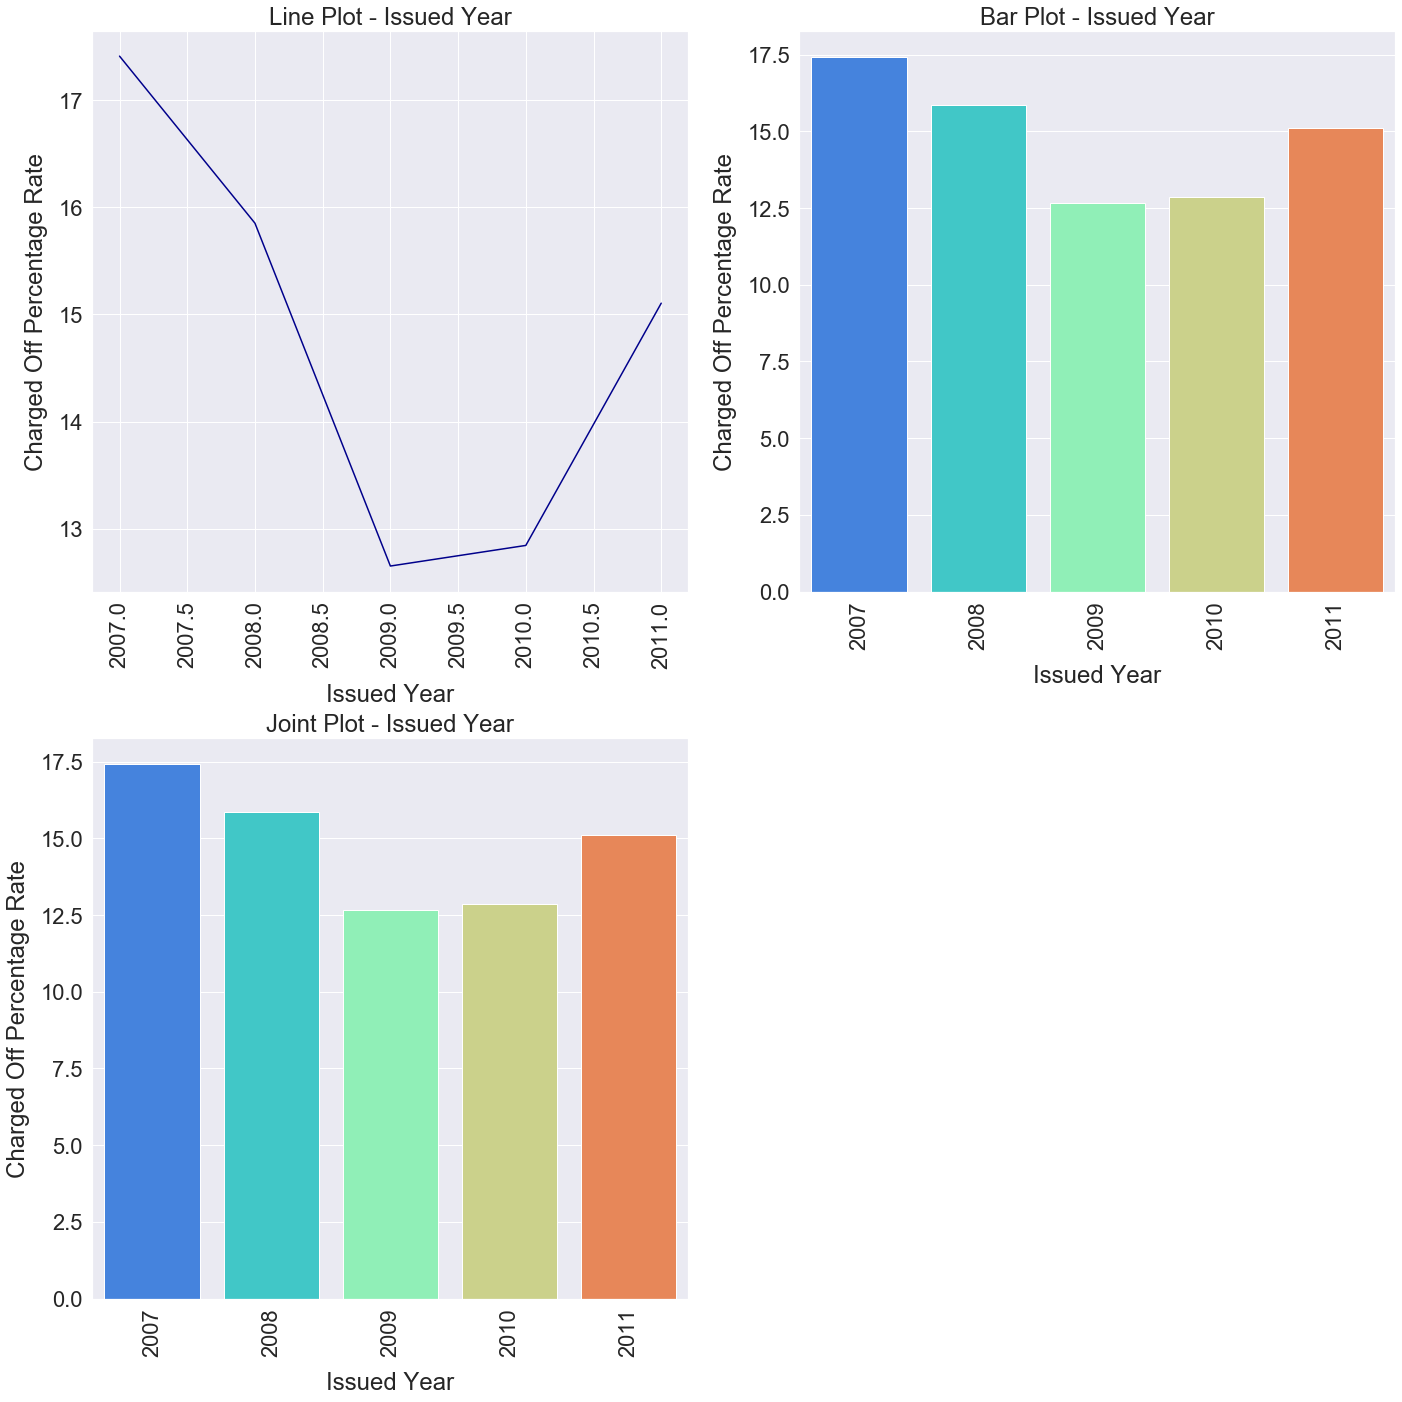

In [167]:
# issue_yr against charged off percentage rate
df = loan.pivot_table(values='funded_amnt', 
                      index='issue_yr', 
                      columns='loan_status',
                      aggfunc=np.count_nonzero, 
                      fill_value=0,
                      margins=True,
                      margins_name='Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 20,
               figsize_y = 20,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Issued Year",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               xlabel_rotation = 90)

<b>Charged off Rate</b> decreases from 2007 to 2009 and then gradually increases from 2009 to 2011.

# Conclusion

##### Major variables to consider for loan prediction:
    1. Loan Purpose
    2. Employment Length
    3. Interest Rate
    4. Annual Income
    5. Grade & Sub-grade
    6. Term
    7. Address State

##### Developed by  - Maninder Singh Bakshi